In [4]:
import vnquant.data as dt
from vnquant import plot as pl

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import pandas as pd

from utils import *

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [5]:
start="2013-01-30"
end="2023-12-31"

pl.vnquant_candle_stick(
    data='VND',
    title=f'VND symbol from {start} to {end}',
    xlab='Date', ylab='Price',
    start_date= start,
    end_date=end,
    data_source='VND',
    show_advanced=['volume', 'macd', 'rsi']
)

2023-11-04 19:24:39,193 : INFO : data VND from 2013-01-30 to 2023-12-31 have already cloned!


**CLONE DATA CÁC MÃ CỔ PHIẾU TỪ VNQUAT**

In [6]:
stock_VCB= SelectedStock("VCB", "2020-01-01", "2023-01-01")
stock_SSI= SelectedStock("SSI", "2020-01-01", "2023-01-01")
stock_FPT= SelectedStock("FPT", "2020-01-01", "2023-01-01")

2023-11-04 19:24:40,535 : INFO : data VCB from 2020-01-01 to 2023-01-01 have already cloned!
2023-11-04 19:24:41,074 : INFO : data SSI from 2020-01-01 to 2023-01-01 have already cloned!
2023-11-04 19:24:41,570 : INFO : data FPT from 2020-01-01 to 2023-01-01 have already cloned!


**THÔNG TIN VỀ MÃ CỔ PHIẾU ĐƯỢC CLONE**

stock_VCB

In [69]:
stock_VCB.stock_infor(5)
stock_VCB.stock_chart()


Attributes  high   low  open close    avg     volume
Symbols      VCB   VCB   VCB   VCB    VCB        VCB
date                                                
2020-01-02  91.4  89.7  90.2  90.8  90.68   386290.0
2020-01-03  91.8  89.9  91.5  89.9  90.81   536130.0
2020-01-06  89.5  87.5  89.2  87.5  88.54   880110.0
2020-01-07  87.9  85.4  87.0  87.8  86.54  1013270.0
2020-01-08  87.9  86.2  86.9  87.0  86.97   722280.0
stock VCB is OHLC: 'True' and OHLCV: 'True'


stock_FPT

In [8]:
stock_FPT.stock_infor(5)
stock_FPT.stock_chart()

Attributes  high   low  open close    avg     volume
Symbols      FPT   FPT   FPT   FPT    FPT        FPT
date                                                
2020-01-02  59.0  58.0  58.3  58.6  58.60   896720.0
2020-01-03  59.1  57.4  58.9  57.6  58.08  2047880.0
2020-01-06  57.6  56.8  57.1  57.0  57.16  1091660.0
2020-01-07  58.1  57.0  57.3  58.1  57.63   837240.0
2020-01-08  57.7  56.8  57.5  56.8  57.13  1814290.0
stock FPT is OHLC: 'True' and OHLCV: 'True'


stock_SSI

In [9]:
stock_SSI.stock_infor(5)
stock_SSI.stock_chart()

Attributes  high    low   open  close    avg     volume
Symbols      SSI    SSI    SSI    SSI    SSI        SSI
date                                                   
2020-01-02  18.4  18.05  18.10  18.40  18.23   991450.0
2020-01-03  18.6  18.15  18.50  18.25  18.36   703890.0
2020-01-06  18.3  18.05  18.15  18.20  18.19  1348120.0
2020-01-07  18.3  18.15  18.20  18.25  18.22   643090.0
2020-01-08  18.1  17.55  18.05  17.75  17.90  2622960.0
stock SSI is OHLC: 'True' and OHLCV: 'True'


**TRỰC QUAN HÓA CÁC CỘT DỮ LIỆU TRONG DATA**

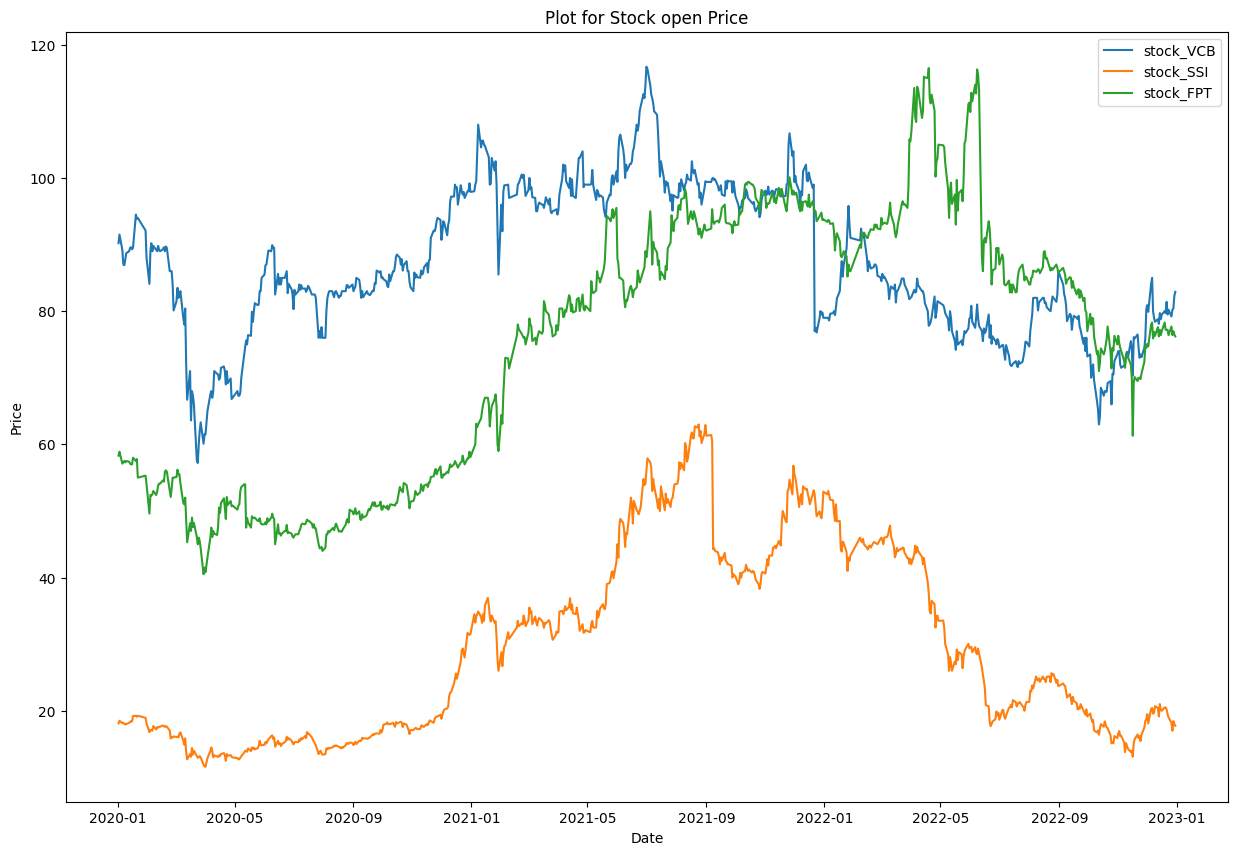

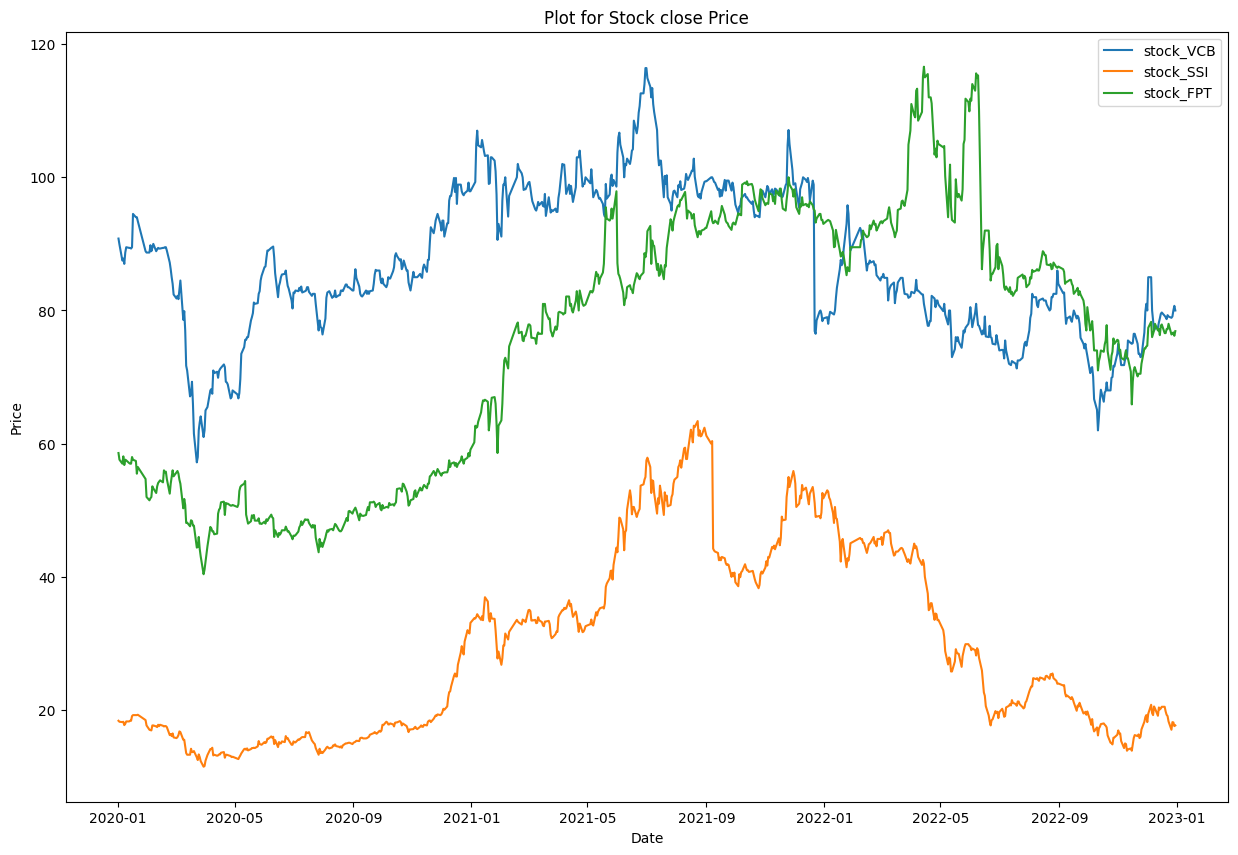

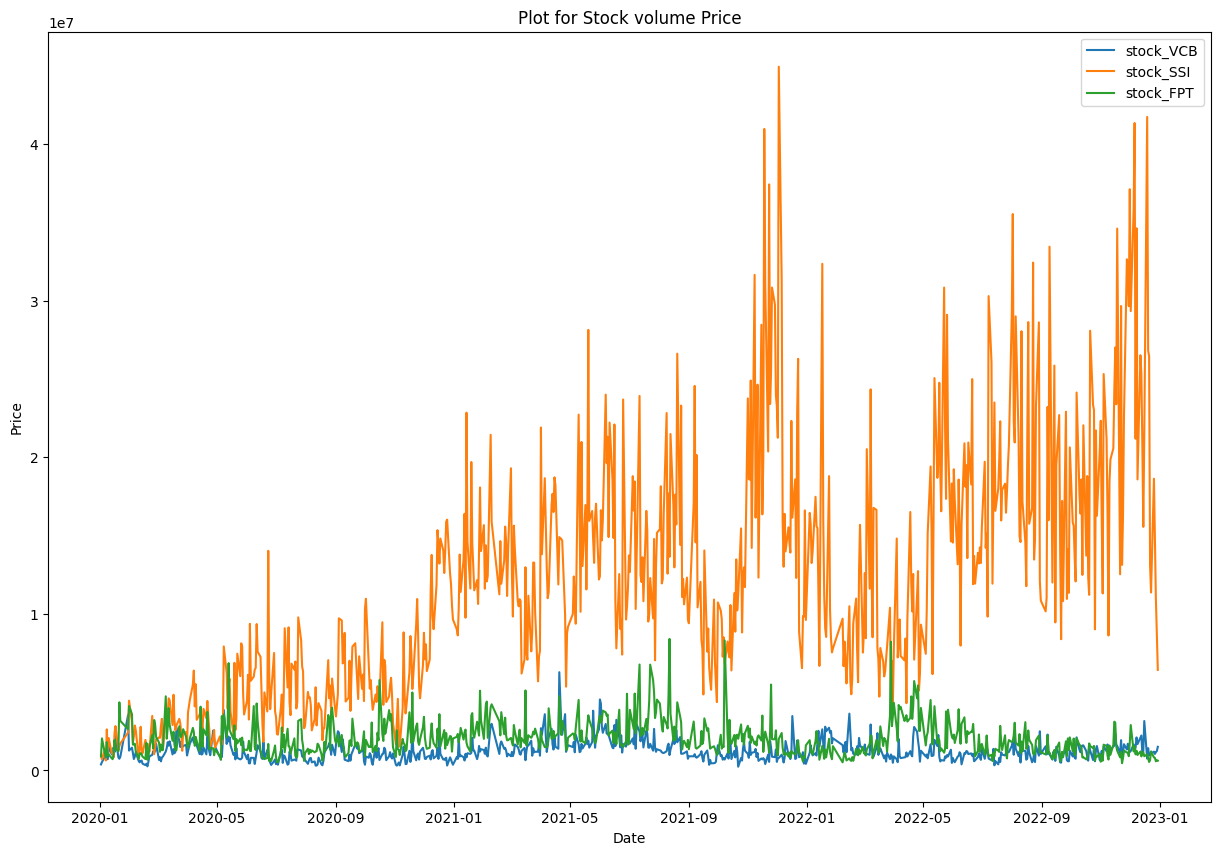

In [11]:
stocks = {
    'stock_VCB': stock_VCB,
    'stock_SSI': stock_SSI,
    'stock_FPT': stock_FPT
}

stockchart.plot_prices('open',stocks)
stockchart.plot_prices('close',stocks)
stockchart.plot_prices('volume',stocks)

**TIẾN HÀNH TÍNH TOÁN CÁC THÔNG SỐ**

stock_VCB

In [12]:
stock_VCB_copy = stock_VCB.data.copy()
stock_VCB_calculate = StockAnalysis(stock_VCB_copy)
stock_VCB_calculate.calculate_moving_average(window=50)
stock_VCB_calculate.calculate_rsi(window=14)
stock_VCB_calculate.calculate_bollinger_bands(window=20)
stock_VCB_calculate.calculate_macd(short_window=12, long_window=26)
stock_VCB_calculate.calculate_daily_returns()
# stock_VCB_calculate.calculate_percent_daily_returns()
# stock_VCB_calculate.calculate_cumulative_returns()


stock_VCB_sharpe_ratio = stock_VCB_calculate.calculate_sharpe_ratio(4)
stock_VCB_gains,stock_VCB_losses=stock_VCB_calculate.calculate_total_gains_and_losses()
print(f"sharpe_ratio : {stock_VCB_sharpe_ratio }")
print(f"total_gains_and_losses: {stock_VCB_gains} and {stock_VCB_losses}")
stock_VCB_calculate.data = stock_VCB_calculate.data.iloc[1:]
print(stock_VCB_calculate.data.head(5))

sharpe_ratio : -3057.5028603914984
total_gains_and_losses: 4.933930575550983 and -5.06056322648435
Attributes  high   low  open close    avg     volume Moving_Average_50 RSI_14  \
Symbols      VCB   VCB   VCB   VCB    VCB        VCB                            
date                                                                            
2020-01-03  91.8  89.9  91.5  89.9  90.81   536130.0               NaN    NaN   
2020-01-06  89.5  87.5  89.2  87.5  88.54   880110.0               NaN    NaN   
2020-01-07  87.9  85.4  87.0  87.8  86.54  1013270.0               NaN    NaN   
2020-01-08  87.9  86.2  86.9  87.0  86.97   722280.0               NaN    NaN   
2020-01-09  88.9  87.7  87.7  88.7  88.24   722670.0               NaN    NaN   

Attributes Upper_Bollinger_Band_20 Lower_Bollinger_Band_20 MACD_12_26  \
Symbols                                                                 
date                                                                    
2020-01-03                     Na

In [13]:
stock_VCB_calculate.data.info()
stock_VCB_calculate.data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2020-01-03 to 2022-12-30
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (high, VCB)                  750 non-null    float64
 1   (low, VCB)                   750 non-null    float64
 2   (open, VCB)                  750 non-null    float64
 3   (close, VCB)                 750 non-null    float64
 4   (avg, VCB)                   750 non-null    float64
 5   (volume, VCB)                750 non-null    float64
 6   (Moving_Average_50, )        702 non-null    float64
 7   (RSI_14, )                   738 non-null    float64
 8   (Upper_Bollinger_Band_20, )  732 non-null    float64
 9   (Lower_Bollinger_Band_20, )  732 non-null    float64
 10  (MACD_12_26, )               750 non-null    float64
 11  (Signal_Line_12_26, )        750 non-null    float64
 12  (Daily_Returns, )            750 non-null    float64
dtypes

Attributes               Symbols
high                     VCB         0
low                      VCB         0
open                     VCB         0
close                    VCB         0
avg                      VCB         0
volume                   VCB         0
Moving_Average_50                   48
RSI_14                              12
Upper_Bollinger_Band_20             18
Lower_Bollinger_Band_20             18
MACD_12_26                           0
Signal_Line_12_26                    0
Daily_Returns                        0
dtype: int64

In [14]:
stock_VCB_calculate.data.describe()

Attributes        high         low        open       close         avg  \
Symbols            VCB         VCB         VCB         VCB         VCB   
count       750.000000  750.000000  750.000000  750.000000  750.000000   
mean         88.055600   85.881200   86.982533   87.034000   86.954068   
std          11.013614   10.868184   11.004433   10.980764   10.943973   
min          58.400000   56.600000   57.200000   57.200000   57.270000   
25%          80.300000   78.200000   79.325000   79.125000   79.235000   
50%          85.950000   84.100000   85.000000   85.000000   85.130000   
75%          98.375000   96.475000   97.300000   97.200000   97.355000   
max         117.200000  115.000000  116.700000  116.400000  116.120000   

Attributes        volume Moving_Average_50      RSI_14  \
Symbols              VCB                                 
count       7.500000e+02        702.000000  738.000000   
mean        1.262614e+06         87.286097   50.748857   
std         6.560273e+05         10.077525   18.249313   
min         2.400000e+05         69.590000    4.878049   
25%         8.217275e+05         78.454000   39.063011   
50%         1.135800e+06         85.013000   49.737177   
75%         1.556850e+06         97.744000   62.646259   
max         6.274200e+06        104.458000   98.692810   

Attributes Upper_Bollinger_Band_20 Lower_Bollinger_Band_20  MACD_12_26  \
Symbols                                                                  
count                   732.000000              732.000000  750.000000   
mean                     92.763003               81.448432   -0.120733   
std                      11.054428               11.254953    1.765175   
min                      72.832341               51.934876   -7.060816   
25%                      84.776732               73.056698   -0.846743   
50%                      91.075259               81.181833   -0.075309   
75%                     101.762267               93.376515    0.856102   
max                     121.034233              102.436093    4.354877   

Attributes Signal_Line_12_26 Daily_Returns  
Symbols                                     
count             750.000000    750.000000  
mean               -0.125929     -0.000169  
std                 1.619247      0.020769  
min                -6.056762     -0.251603  
25%                -0.829498     -0.009327  
50%                -0.124856      0.000000  
75%                 0.747471      0.009093  
max                 4.025262      0.066691

stock_FPT

In [15]:
stock_FPT_copy = stock_FPT.data.copy()
stock_FPT_calculate = StockAnalysis(stock_FPT_copy)
stock_FPT_calculate.calculate_moving_average(window=50)
stock_FPT_calculate.calculate_rsi(window=14)
stock_FPT_calculate.calculate_bollinger_bands(window=20)
stock_FPT_calculate.calculate_macd(short_window=12, long_window=26)
stock_FPT_calculate.calculate_daily_returns()
# stock_FPT_calculate.calculate_cumulative_returns()

stock_FPT_sharpe_ratio = stock_FPT_calculate.calculate_sharpe_ratio(4)
stock_FPT_gains,stock_FPT_losses= stock_FPT_calculate.calculate_total_gains_and_losses()
print(f"sharpe_ratio : {stock_FPT_sharpe_ratio }")
print(f"total_gains_and_losses: {stock_FPT_gains} and {stock_FPT_losses}")
stock_FPT_calculate.data = stock_FPT_calculate.data.iloc[1:]
print(stock_FPT_calculate.data.head(5))

sharpe_ratio : -2891.286376055929
total_gains_and_losses: 5.283423796605945 and -5.011652616677313
Attributes  high   low  open close    avg     volume Moving_Average_50 RSI_14  \
Symbols      FPT   FPT   FPT   FPT    FPT        FPT                            
date                                                                            
2020-01-03  59.1  57.4  58.9  57.6  58.08  2047880.0               NaN    NaN   
2020-01-06  57.6  56.8  57.1  57.0  57.16  1091660.0               NaN    NaN   
2020-01-07  58.1  57.0  57.3  58.1  57.63   837240.0               NaN    NaN   
2020-01-08  57.7  56.8  57.5  56.8  57.13  1814290.0               NaN    NaN   
2020-01-09  57.7  57.1  57.3  57.6  57.43   967050.0               NaN    NaN   

Attributes Upper_Bollinger_Band_20 Lower_Bollinger_Band_20 MACD_12_26  \
Symbols                                                                 
date                                                                    
2020-01-03                     Na

In [16]:
stock_FPT_calculate.data.info()
stock_FPT_calculate.data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2020-01-03 to 2022-12-30
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (high, FPT)                  750 non-null    float64
 1   (low, FPT)                   750 non-null    float64
 2   (open, FPT)                  750 non-null    float64
 3   (close, FPT)                 750 non-null    float64
 4   (avg, FPT)                   750 non-null    float64
 5   (volume, FPT)                750 non-null    float64
 6   (Moving_Average_50, )        702 non-null    float64
 7   (RSI_14, )                   738 non-null    float64
 8   (Upper_Bollinger_Band_20, )  732 non-null    float64
 9   (Lower_Bollinger_Band_20, )  732 non-null    float64
 10  (MACD_12_26, )               750 non-null    float64
 11  (Signal_Line_12_26, )        750 non-null    float64
 12  (Daily_Returns, )            750 non-null    float64
dtypes

Attributes               Symbols
high                     FPT         0
low                      FPT         0
open                     FPT         0
close                    FPT         0
avg                      FPT         0
volume                   FPT         0
Moving_Average_50                   48
RSI_14                              12
Upper_Bollinger_Band_20             18
Lower_Bollinger_Band_20             18
MACD_12_26                           0
Signal_Line_12_26                    0
Daily_Returns                        0
dtype: int64

In [17]:
stock_FPT_calculate.data.describe()

Attributes        high         low        open       close         avg  \
Symbols            FPT         FPT         FPT         FPT         FPT   
count       750.000000  750.000000  750.000000  750.000000  750.000000   
mean         76.222467   74.405533   75.279133   75.318067   75.313131   
std          19.945816   19.372299   19.643853   19.633819   19.649285   
min          41.100000   40.100000   40.500000   40.400000   40.470000   
25%          54.500000   53.525000   54.000000   54.000000   54.002500   
50%          80.450000   78.600000   79.700000   79.600000   79.340000   
75%          93.400000   91.700000   92.500000   92.625000   92.555000   
max         118.900000  115.200000  116.500000  116.600000  117.270000   

Attributes        volume Moving_Average_50      RSI_14  \
Symbols              FPT                                 
count       7.500000e+02        702.000000  738.000000   
mean        2.032965e+06         75.980229   52.955292   
std         1.108674e+06         19.411000   17.059363   
min         4.659000e+05         46.864000   14.041096   
25%         1.243575e+06         52.810500   40.438165   
50%         1.800940e+06         82.418000   53.082601   
75%         2.505850e+06         93.024000   66.133242   
max         8.399400e+06        106.798000   92.857143   

Attributes Upper_Bollinger_Band_20 Lower_Bollinger_Band_20  MACD_12_26  \
Symbols                                                                  
count                   732.000000              732.000000  750.000000   
mean                     80.572876               70.446550    0.159704   
std                      21.545397               18.202640    1.683537   
min                      47.804138               39.241541   -5.204407   
25%                      56.917889               50.643605   -0.668298   
50%                      84.131094               75.535208    0.243708   
75%                      96.876933               85.662943    0.967103   
max                     126.646811              102.681975    5.352093   

Attributes Signal_Line_12_26 Daily_Returns  
Symbols                                     
count             750.000000    750.000000  
mean                0.155689      0.000362  
std                 1.549334      0.021960  
min                -4.434167     -0.243810  
25%                -0.628847     -0.007359  
50%                 0.273453      0.000501  
75%                 0.908632      0.009965  
max                 4.807079      0.067627

Stock_SSI

In [18]:
stock_SSI_copy = stock_SSI.data.copy()
stock_SSI_calculate = StockAnalysis(stock_SSI_copy)
stock_SSI_calculate.calculate_moving_average(window=50)
stock_SSI_calculate.calculate_rsi(window=14)
stock_SSI_calculate.calculate_bollinger_bands(window=20)
stock_SSI_calculate.calculate_macd(short_window=12, long_window=26)
stock_SSI_calculate.calculate_daily_returns()
# stock_SSI_calculate.calculate_cumulative_returns()

stock_SSI_sharpe_ratio = stock_SSI_calculate.calculate_sharpe_ratio(4)
stock_SSI_gains,stock_SSI_losses= stock_SSI_calculate.calculate_total_gains_and_losses()
print(f"sharpe_ratio : {stock_SSI_sharpe_ratio }")
print(f"total_gains_and_losses: {stock_SSI_gains} and {stock_SSI_losses}")
stock_SSI_calculate.data = stock_SSI_calculate.data.iloc[1:]
print(stock_SSI_calculate.data.head(1))

sharpe_ratio : -1914.2424527717499
total_gains_and_losses: 8.712399580933418 and -8.751185605968573
Attributes  high    low  open  close    avg    volume Moving_Average_50  \
Symbols      SSI    SSI   SSI    SSI    SSI       SSI                     
date                                                                      
2020-01-03  18.6  18.15  18.5  18.25  18.36  703890.0               NaN   

Attributes RSI_14 Upper_Bollinger_Band_20 Lower_Bollinger_Band_20 MACD_12_26  \
Symbols                                                                        
date                                                                           
2020-01-03    NaN                     NaN                     NaN  -0.011966   

Attributes Signal_Line_12_26 Daily_Returns  
Symbols                                     
date                                        
2020-01-03         -0.002393     -0.008186  


In [19]:
stock_SSI_calculate.data.info()
stock_SSI_calculate.data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2020-01-03 to 2022-12-30
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (high, SSI)                  750 non-null    float64
 1   (low, SSI)                   750 non-null    float64
 2   (open, SSI)                  750 non-null    float64
 3   (close, SSI)                 750 non-null    float64
 4   (avg, SSI)                   750 non-null    float64
 5   (volume, SSI)                750 non-null    float64
 6   (Moving_Average_50, )        702 non-null    float64
 7   (RSI_14, )                   738 non-null    float64
 8   (Upper_Bollinger_Band_20, )  732 non-null    float64
 9   (Lower_Bollinger_Band_20, )  732 non-null    float64
 10  (MACD_12_26, )               750 non-null    float64
 11  (Signal_Line_12_26, )        750 non-null    float64
 12  (Daily_Returns, )            750 non-null    float64
dtypes

Attributes               Symbols
high                     SSI         0
low                      SSI         0
open                     SSI         0
close                    SSI         0
avg                      SSI         0
volume                   SSI         0
Moving_Average_50                   48
RSI_14                              12
Upper_Bollinger_Band_20             18
Lower_Bollinger_Band_20             18
MACD_12_26                           0
Signal_Line_12_26                    0
Daily_Returns                        0
dtype: int64

In [20]:
stock_SSI_calculate.data.describe()

Attributes        high         low        open       close         avg  \
Symbols            SSI         SSI         SSI         SSI         SSI   
count       750.000000  750.000000  750.000000  750.000000  750.000000   
mean         30.067200   28.939533   29.490333   29.493333   29.499073   
std          14.314014   13.802540   14.050835   14.054822   14.054302   
min          11.900000   11.100000   11.600000   11.500000   11.600000   
25%          17.312500   16.725000   17.100000   17.100000   17.055000   
50%          25.475000   24.600000   25.125000   25.050000   25.005000   
75%          42.787500   41.562500   42.000000   41.975000   42.120000   
max          63.600000   61.800000   63.000000   63.400000   62.810000   

Attributes        volume Moving_Average_50      RSI_14  \
Symbols              SSI                                 
count       7.500000e+02        702.000000  738.000000   
mean        1.197594e+07         30.275718   52.292182   
std         7.733899e+06         13.620587   20.377863   
min         6.430900e+05         13.423000    4.464286   
25%         5.882772e+06         16.972000   37.142857   
50%         1.095004e+07         27.532000   51.419068   
75%         1.615352e+07         44.055750   68.630546   
max         4.493090e+07         56.544000   95.652174   

Attributes Upper_Bollinger_Band_20 Lower_Bollinger_Band_20  MACD_12_26  \
Symbols                                                                  
count                   732.000000              732.000000  750.000000   
mean                     33.434657               26.087563    0.001147   
std                      15.840680               12.470446    1.554144   
min                      13.727146               10.730647   -4.371809   
25%                      18.586431               14.920740   -0.773838   
50%                      31.248032               22.060703    0.060225   
75%                      46.864048               38.056919    0.655851   
max                      73.165802               57.631908    3.874363   

Attributes Signal_Line_12_26 Daily_Returns  
Symbols                                     
count             750.000000    750.000000  
mean               -0.000658     -0.000052  
std                 1.472939      0.033172  
min                -3.989710     -0.311134  
25%                -0.769657     -0.014806  
50%                 0.072506      0.000000  
75%                 0.612847      0.016208  
max                 3.467670      0.067620

**KHỞI TẠO CHUỖI LỢI XUẤT THAY CHO VIỆC DỰ ĐOÁN CHUỖI GIÁ ĐÓNG**

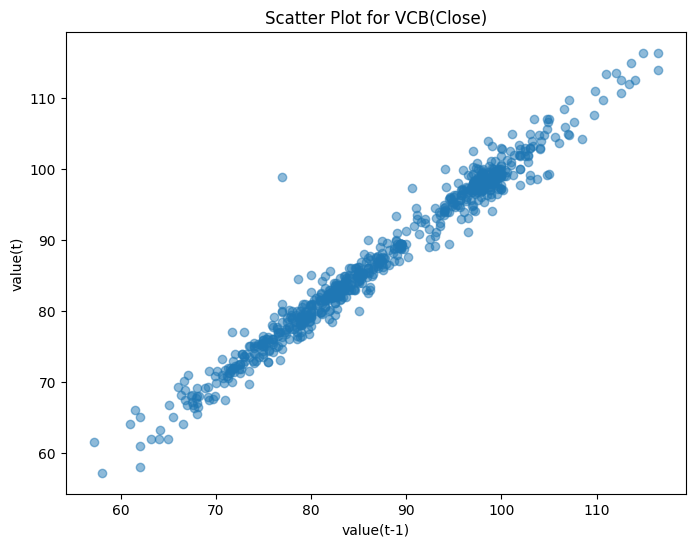

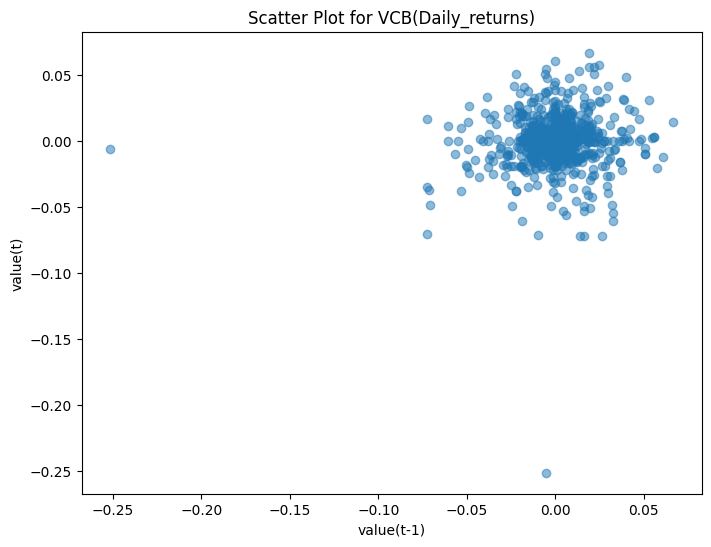

In [21]:
stockchart.plot_scatter('close',stock_VCB_calculate.data,"VCB")
stockchart.plot_scatter('Daily_Returns',stock_VCB_calculate.data,"VCB")


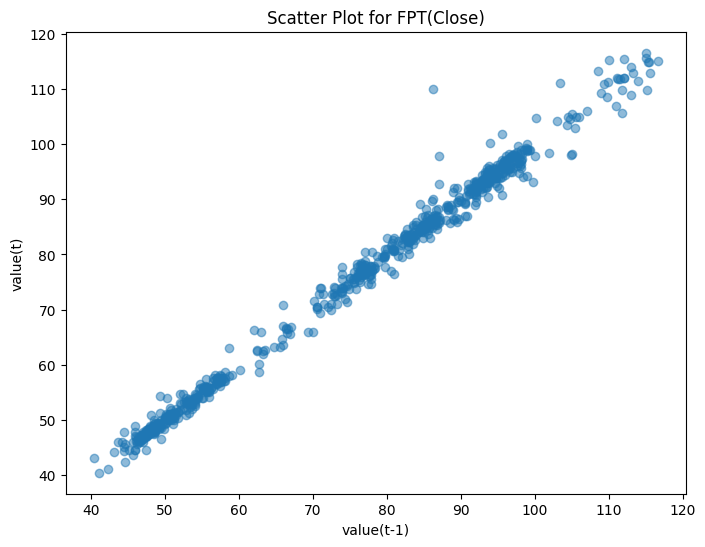

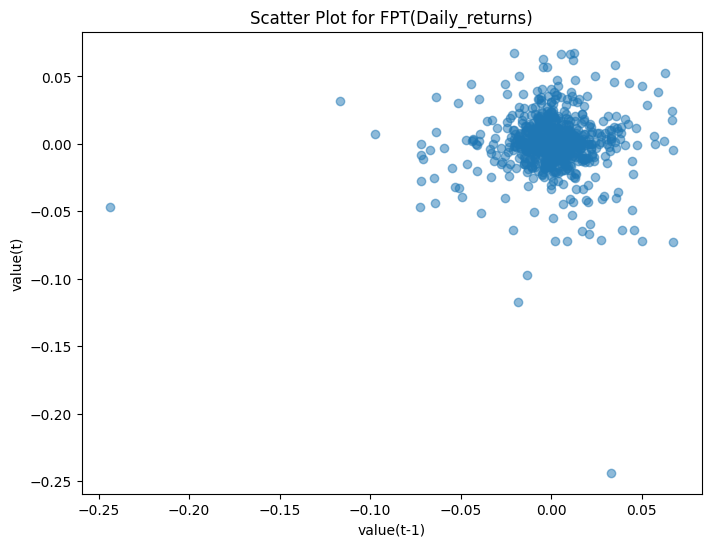

In [22]:
stockchart.plot_scatter('close',stock_FPT_calculate.data,"FPT")
stockchart.plot_scatter('Daily_Returns',stock_FPT_calculate.data,"FPT")

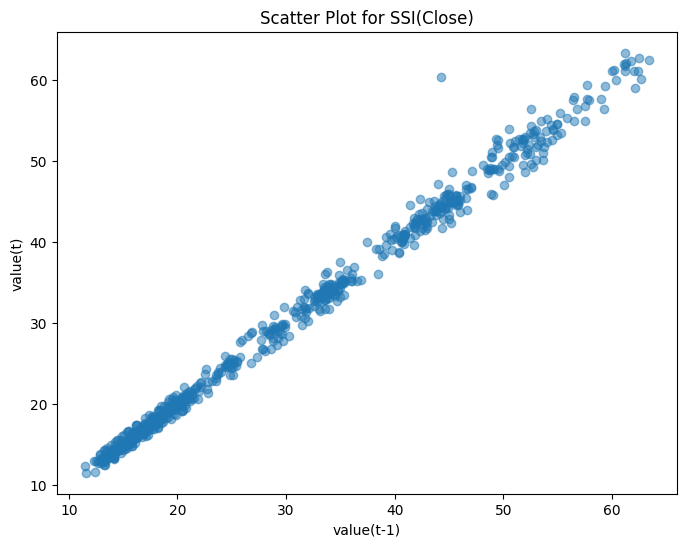

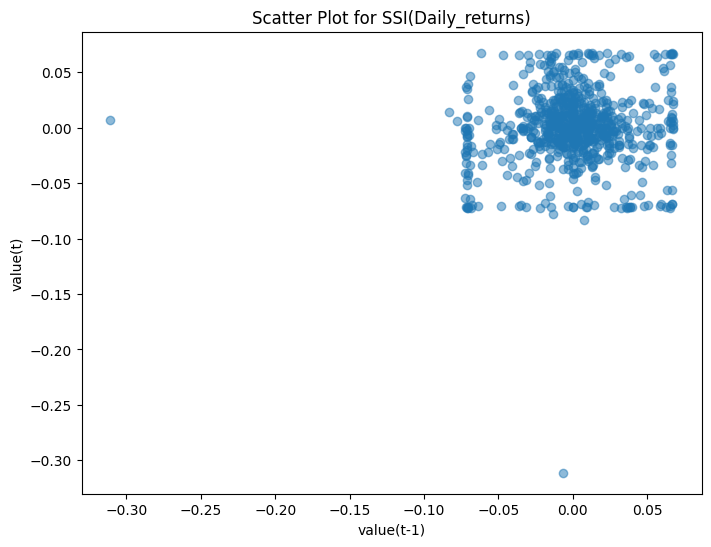

In [23]:
stockchart.plot_scatter('close',stock_SSI_calculate.data,"SSI")
stockchart.plot_scatter('Daily_Returns',stock_SSI_calculate.data,"SSI")

**XÁC ĐỊNH LOẠI BỎ GIÁ TRỊ NGOẠI LAI**

VCB

750


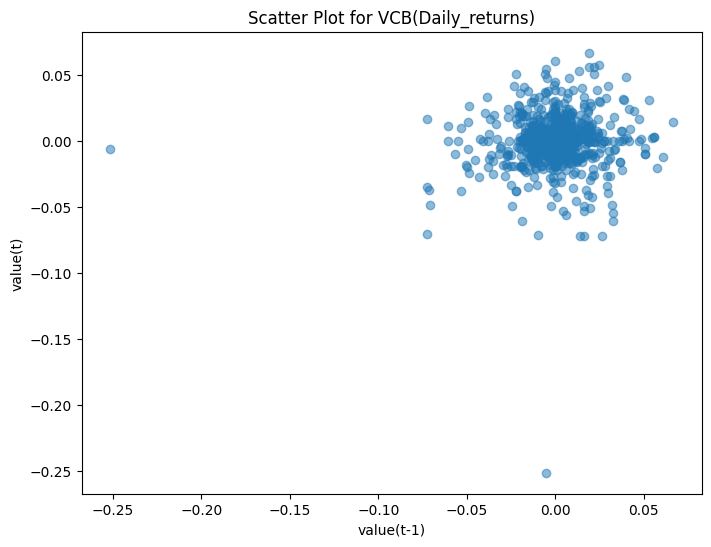

Đã loại bỏ 1 phần tử
750


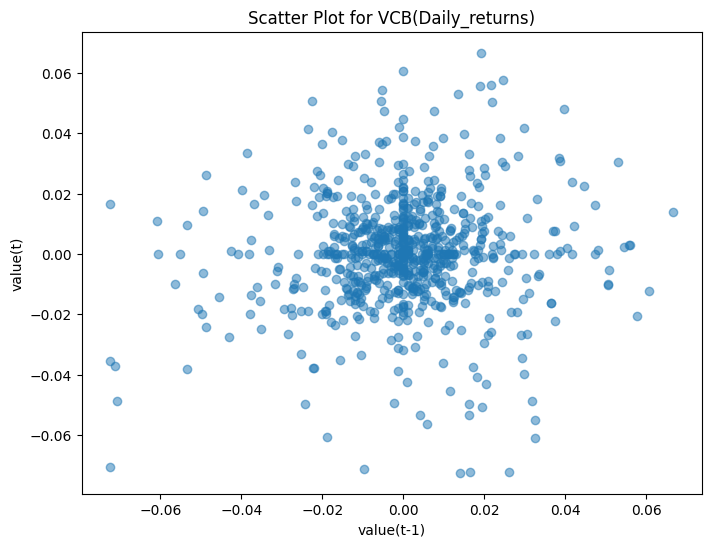

In [64]:
print(len(stock_VCB_calculate.data))
stockchart.plot_scatter('Daily_Returns',stock_VCB_calculate.data,"VCB")
VCB_cleaned = remove_outliers_IQR(stock_VCB_calculate.data,"Daily_Returns",4)

# has_nan = VCB_cleaned["Daily_Returns"].isna()
# VCB_cleaned = VCB_cleaned[~has_nan]

print(len(VCB_cleaned))
stockchart.plot_scatter('Daily_Returns',VCB_cleaned,"VCB")

In [79]:
import pandas as pd
full_date_rng =  pd.date_range(start=VCB_cleaned.index[0], end=VCB_cleaned.index[-1], freq='D')

# Sử dụng reindex để bổ sung các ngày bị bỏ sót và lấp đầy giá trị NaN
df = VCB_cleaned.reindex(full_date_rng)


print(df.isna().sum())


Attributes               Symbols
high                     VCB        343
low                      VCB        343
open                     VCB        343
close                    VCB        343
avg                      VCB        343
volume                   VCB        343
Moving_Average_50                   391
RSI_14                              355
Upper_Bollinger_Band_20             361
Lower_Bollinger_Band_20             361
MACD_12_26                          343
Signal_Line_12_26                   343
Daily_Returns                       344
dtype: int64


FPT

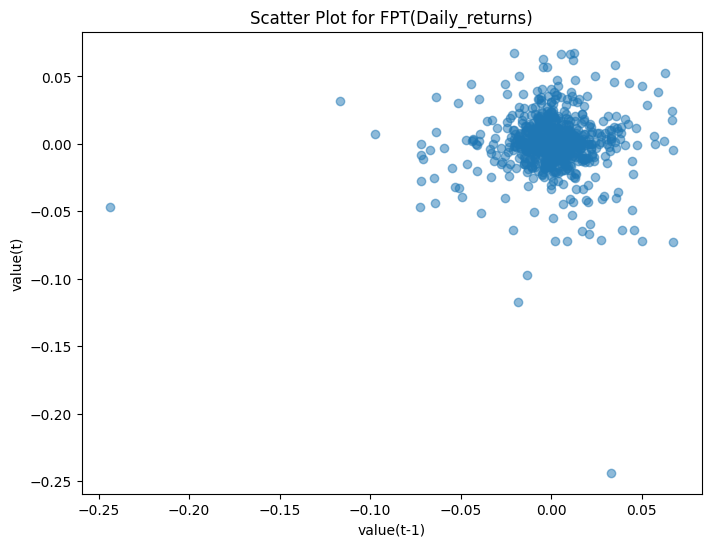

Đã loại bỏ 3 phần tử


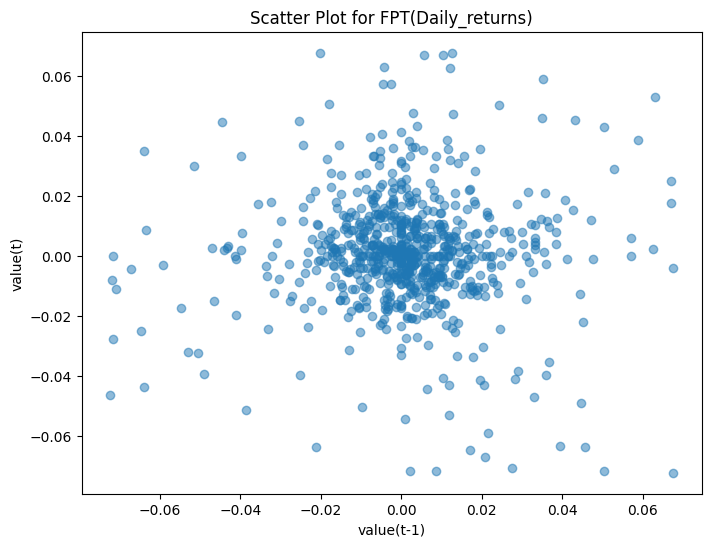

In [25]:
stockchart.plot_scatter('Daily_Returns',stock_FPT_calculate.data,"FPT")
FPT_cleaned = remove_outliers_IQR(stock_FPT_calculate.data,"Daily_Returns",4)
has_nan = FPT_cleaned["Daily_Returns"].isna()
FPT_cleaned = FPT_cleaned[~has_nan]
stockchart.plot_scatter('Daily_Returns',FPT_cleaned,"FPT")

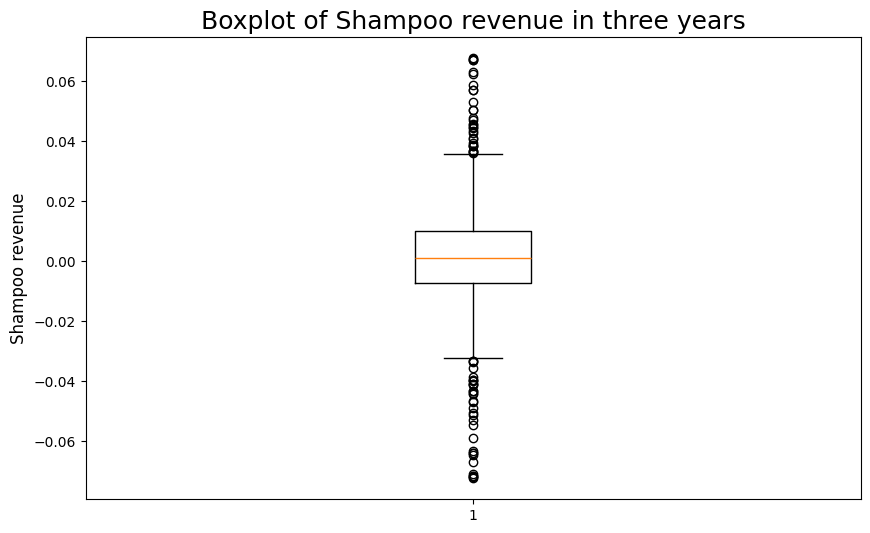

In [81]:
plt.figure(figsize=(10, 6))
plt.boxplot(FPT_cleaned["Daily_Returns"])
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Boxplot of Shampoo revenue in three years", fontsize=18)
plt.show()

SSI

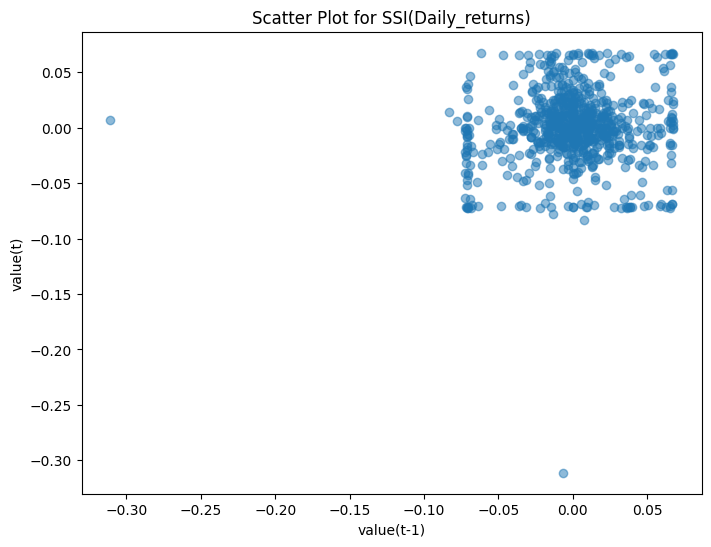

Đã loại bỏ 1 phần tử


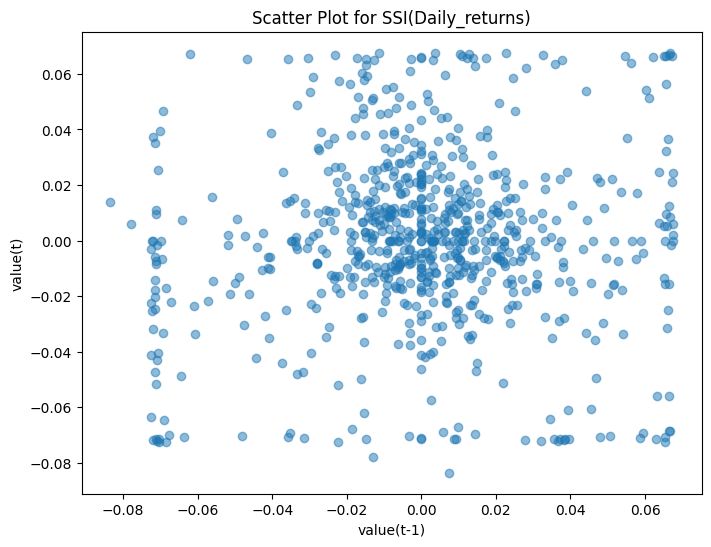

In [26]:
stockchart.plot_scatter('Daily_Returns',stock_SSI_calculate.data,"SSI")
SSI_cleaned = remove_outliers_IQR(stock_SSI_calculate.data,"Daily_Returns",4)
has_nan = SSI_cleaned["Daily_Returns"].isna()
SSI_cleaned = SSI_cleaned[~has_nan]
stockchart.plot_scatter('Daily_Returns',SSI_cleaned,"SSI")

**TRỰC QUAN HÓA PHÂN BỔ XÁC XUẤT CỦA CHUỖI LỢI XUẤT**

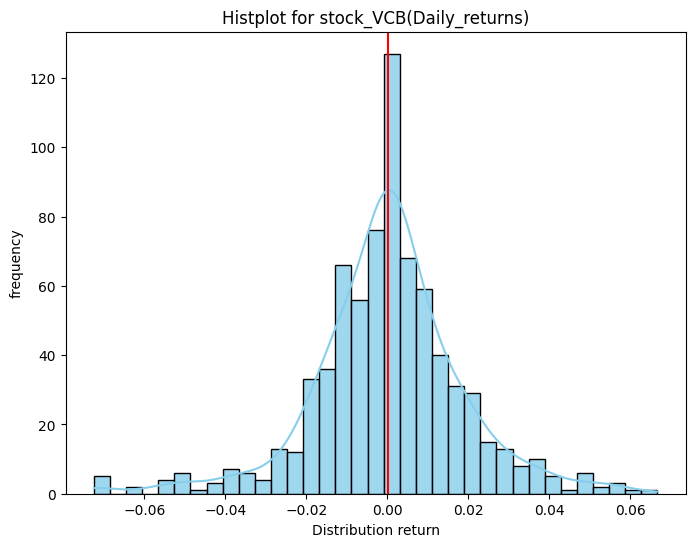

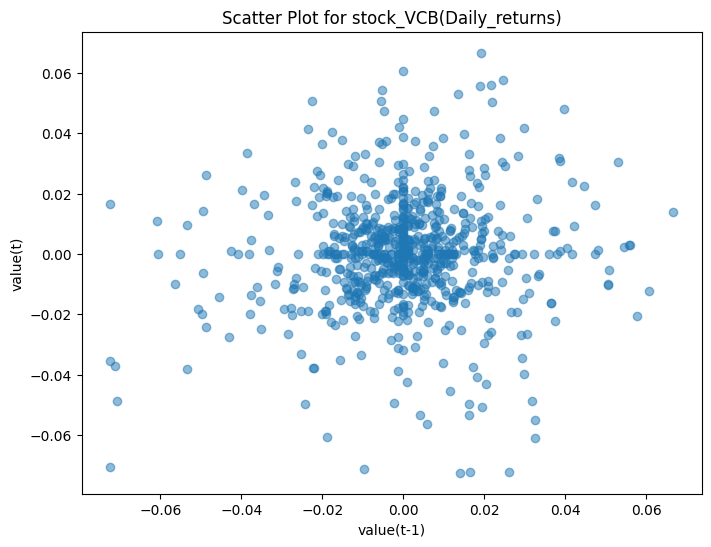

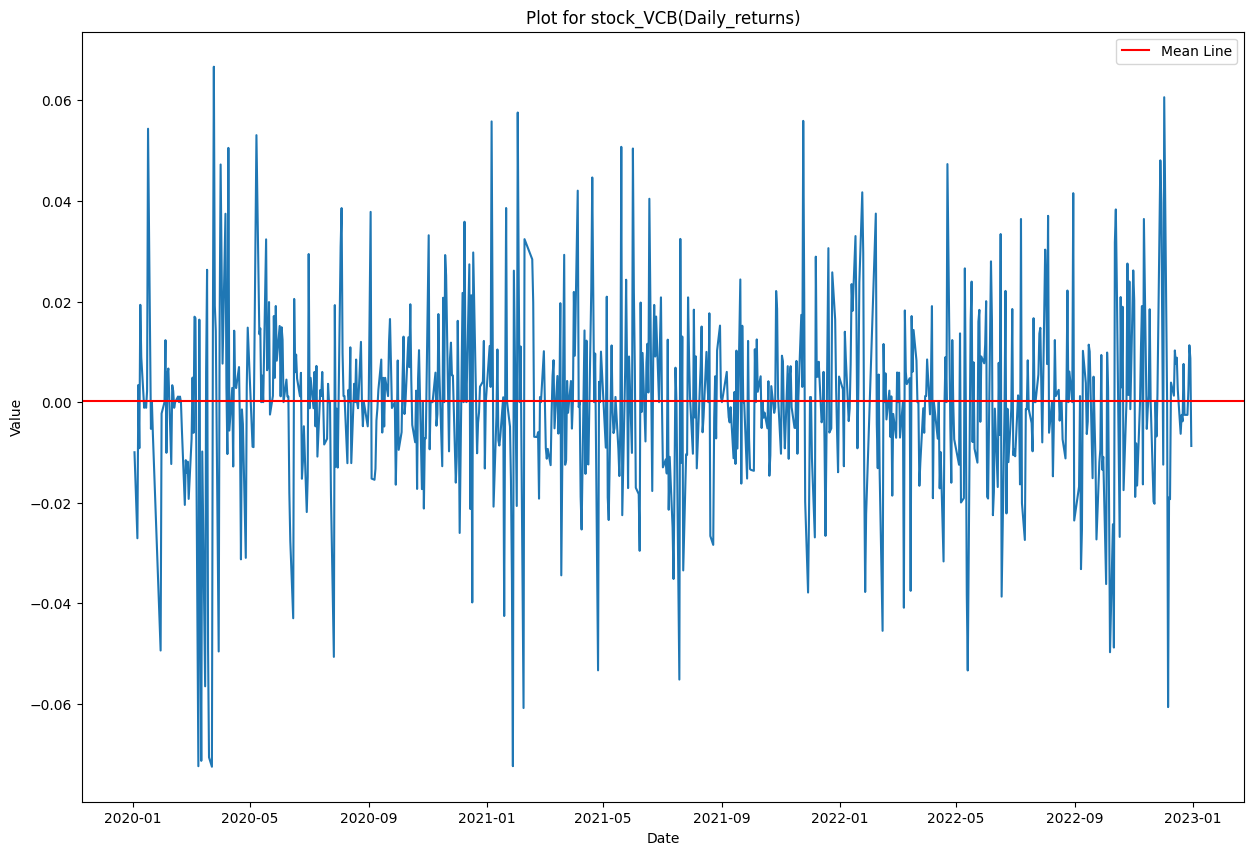

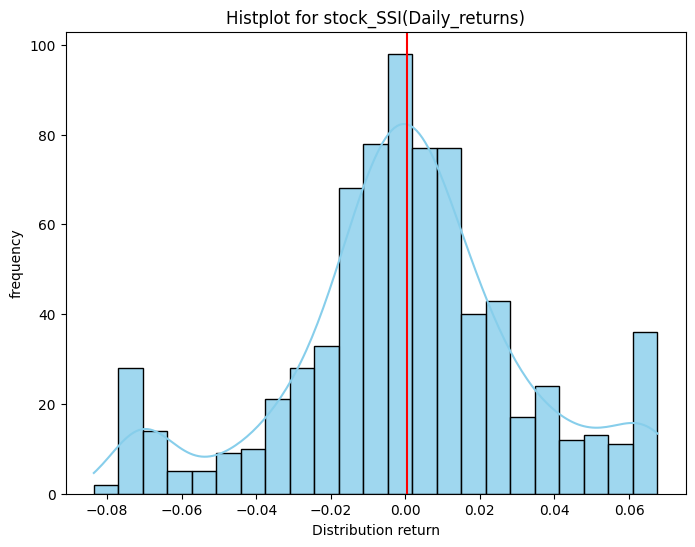

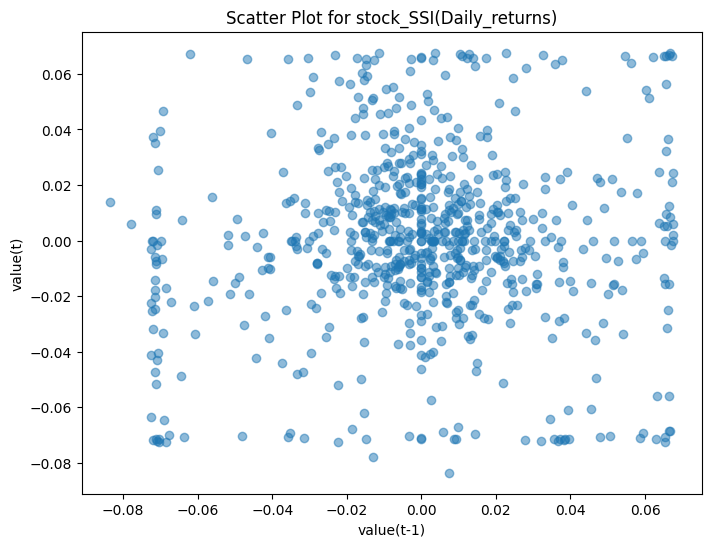

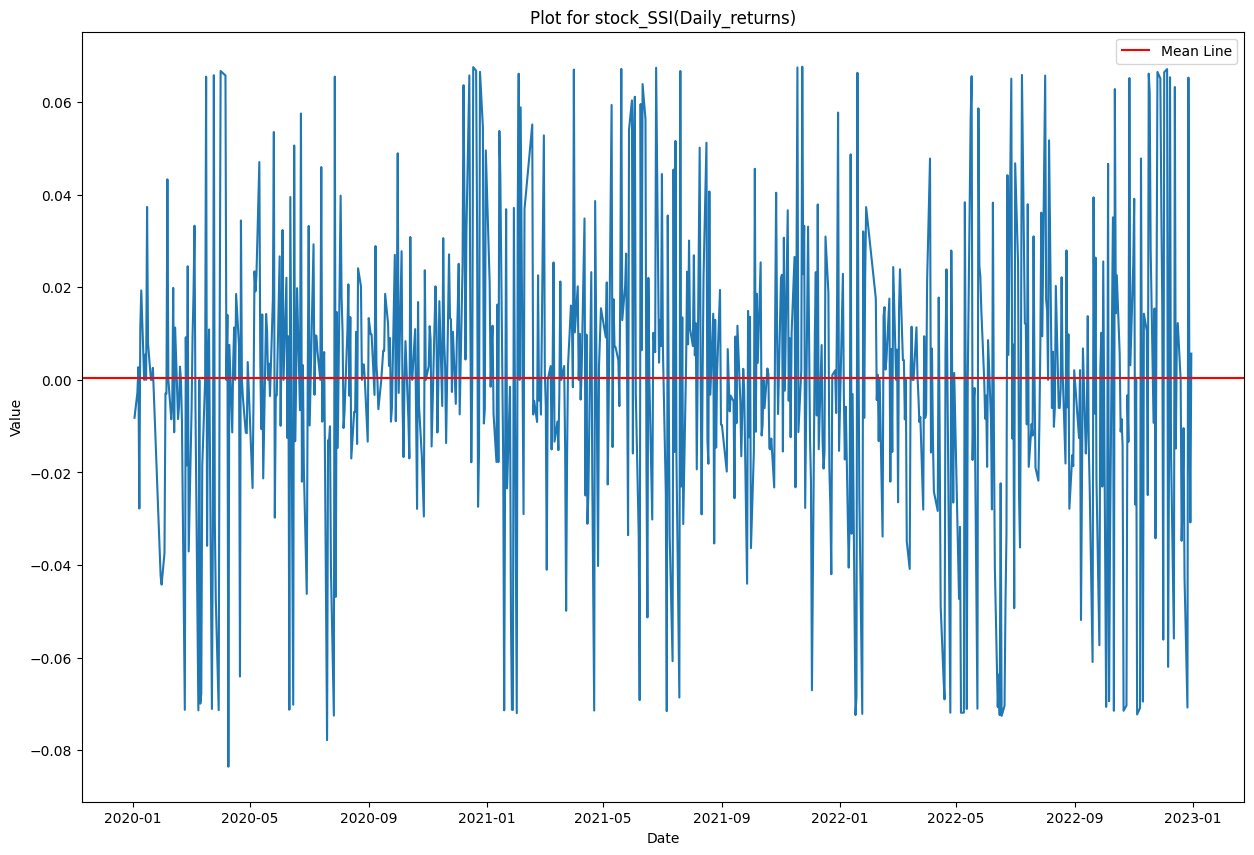

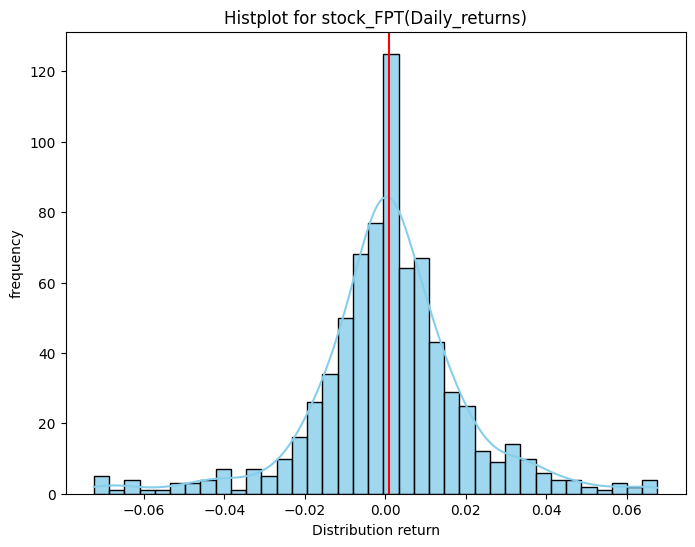

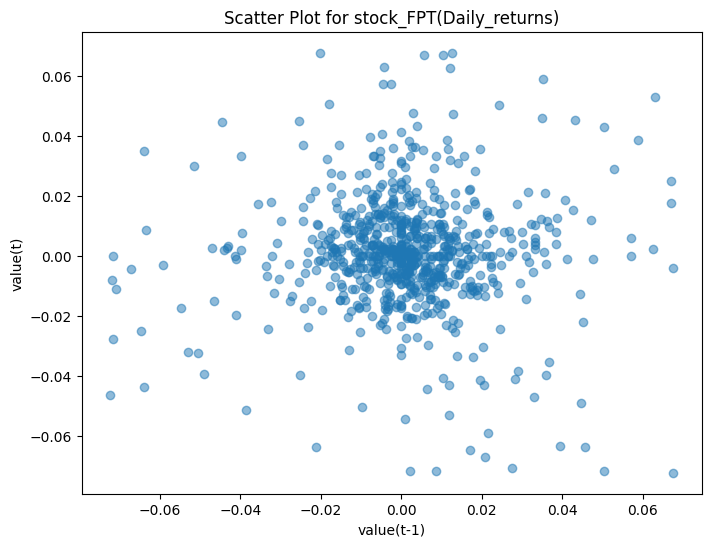

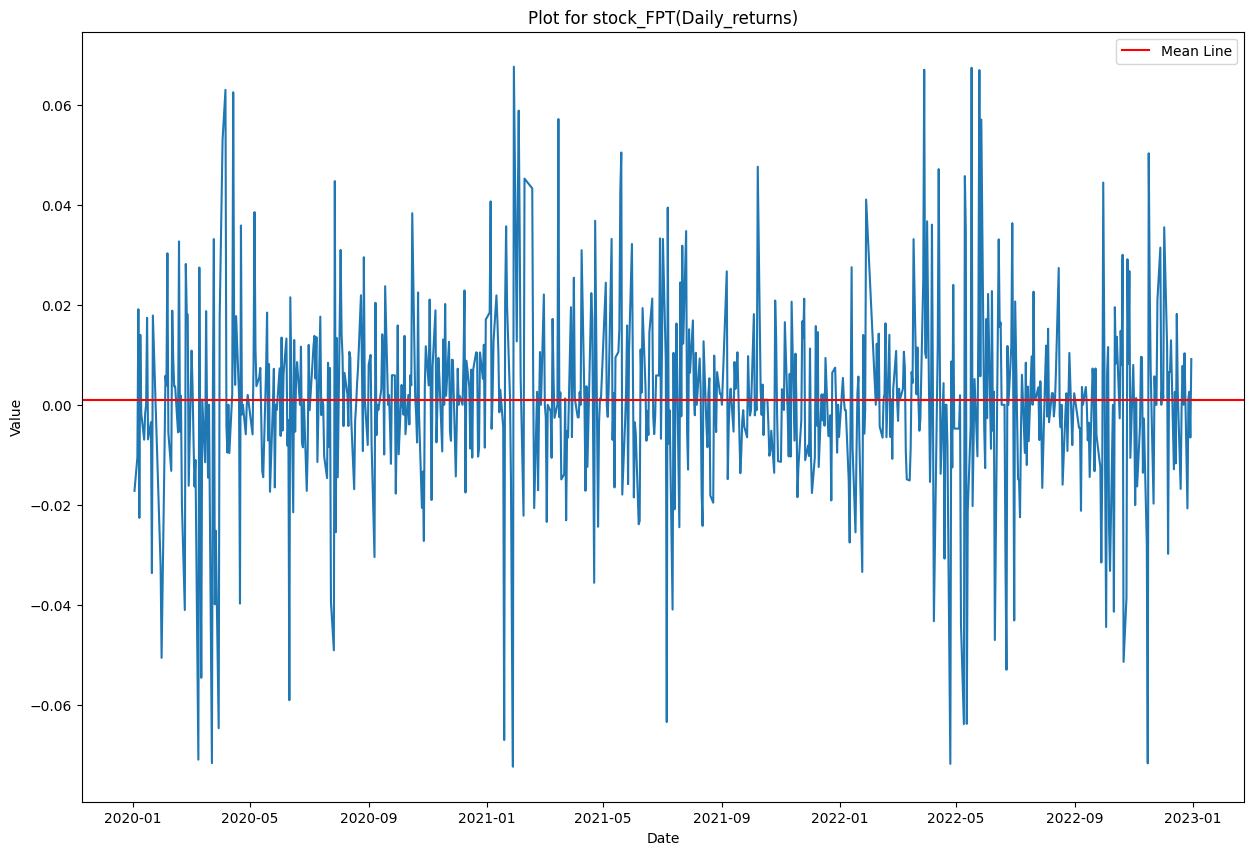

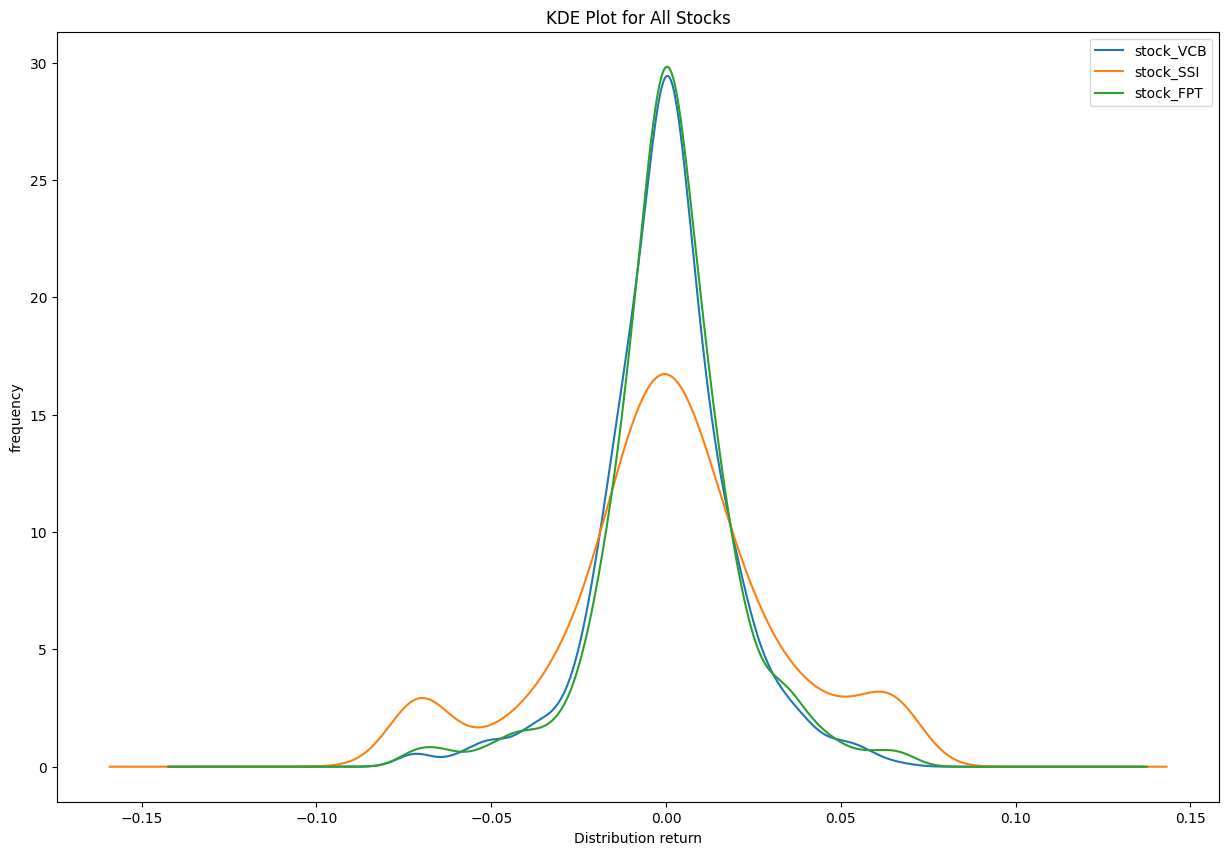

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

stocks = {
    'stock_VCB': VCB_cleaned,
    'stock_SSI': SSI_cleaned,
    'stock_FPT': FPT_cleaned
}
# multi_chart_KDE = MultiStockChart(stocks)
stockchart.plot_ultimate('Daily_Returns',stocks)

**CHECKING CHỈ SỐ AIC (ĐIỀU KIỆN CHỌN CHUỖI TIME  SERIES CÓ P<0.05**

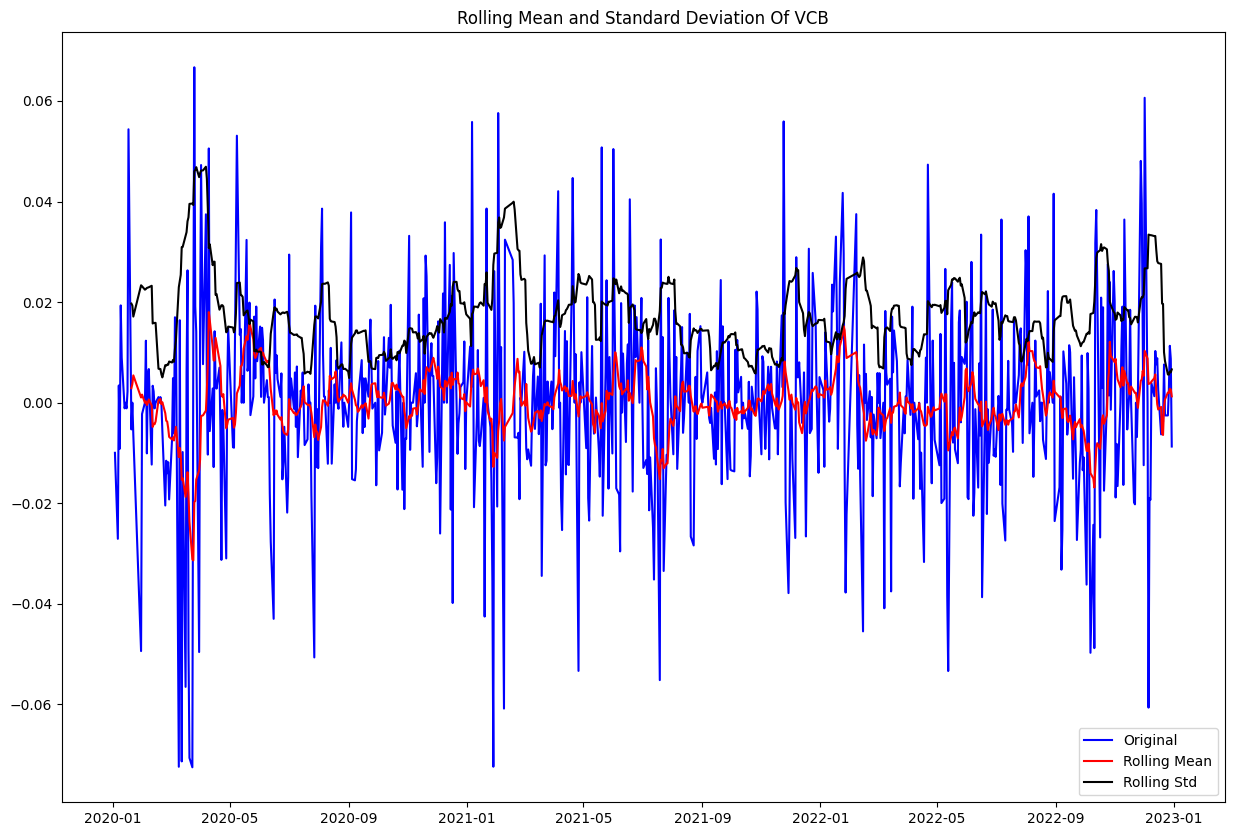

Results of Argument dickey fuller test VCB:
Test Statistics                -25.381958
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [28]:
test_stationarity(VCB_cleaned['Daily_Returns'],"VCB")

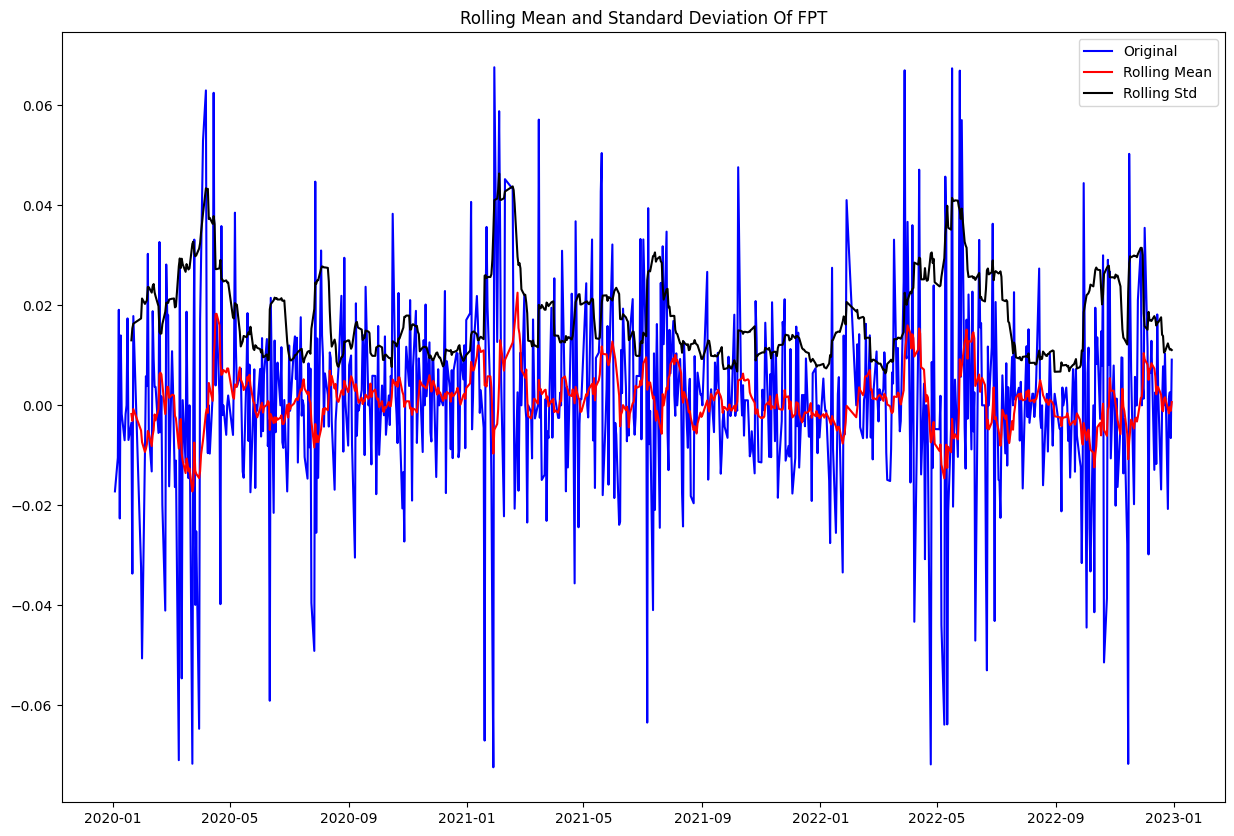

Results of Argument dickey fuller test FPT:
Test Statistics               -9.507548e+00
p-value                        3.315969e-16
No. of lags used               6.000000e+00
Number of observations used    7.400000e+02
critical value (1%)           -3.439218e+00
critical value (5%)           -2.865454e+00
critical value (10%)          -2.568854e+00
dtype: float64


In [29]:
test_stationarity(FPT_cleaned['Daily_Returns'],"FPT")


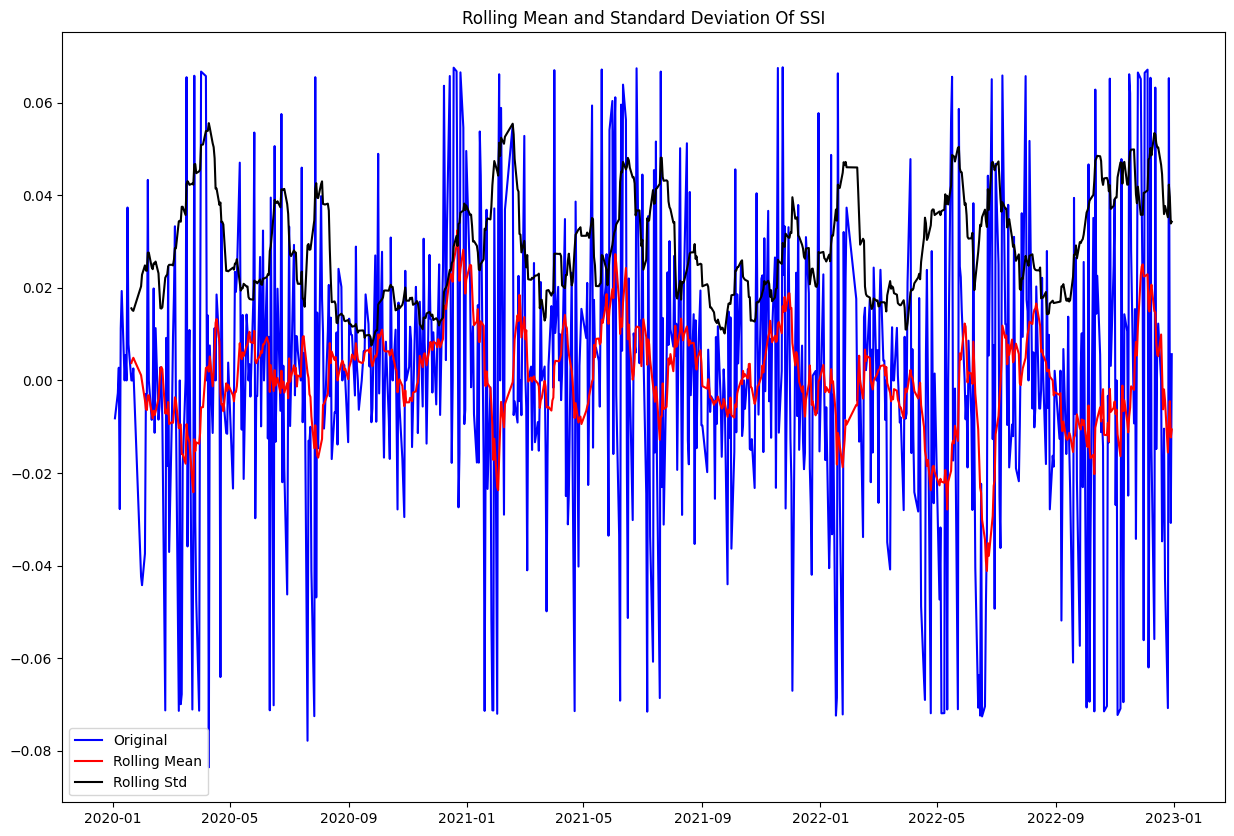

Results of Argument dickey fuller test SSI:
Test Statistics                -25.655529
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [30]:
test_stationarity(SSI_cleaned['Daily_Returns'],"SSI")

In [31]:
# stock_VCB_calculate.data_1 = stock_VCB_calculate.data.droplevel('Symbols', axis=1)
# VCB_cleaned_test = remove_outliers_IQR(stock_VCB_calculate.data_1,"close",20)
# stock_FPT_calculate.data_1 = stock_FPT_calculate.data.droplevel('Symbols', axis=1)
# FPT_cleaned_test = remove_outliers_IQR(stock_FPT_calculate.data_1,"close",20)
# stock_SSI_calculate.data_1 = stock_SSI_calculate.data.droplevel('Symbols', axis=1)
# SSI_cleaned_test = remove_outliers_IQR(stock_SSI_calculate.data_1,"close",20)

# VCB_Diff_1 = VCB_cleaned_test['close'].diff().dropna()
# test_stationarity(VCB_Diff_1 ,"VCB")
# FPT_Diff_1 = FPT_cleaned['close'].diff().dropna()
# test_stationarity(FPT_Diff_1 ,"FPT")
# SSI_Diff_1 = SSI_cleaned['close'].diff().dropna()
# test_stationarity(SSI_Diff_1 ,"SSI")

**TEST_ARIMA_AUTO**

<Figure size 1500x500 with 0 Axes>

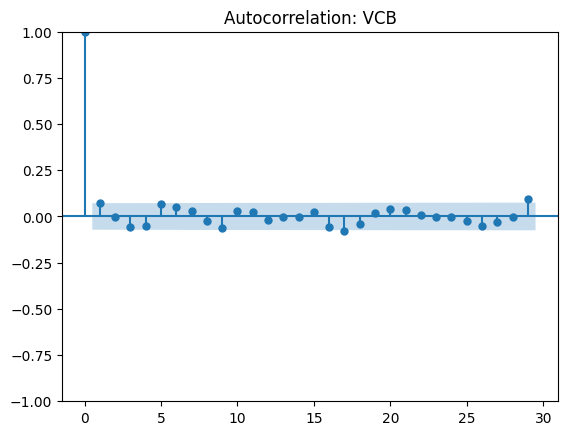

<Figure size 1500x500 with 0 Axes>

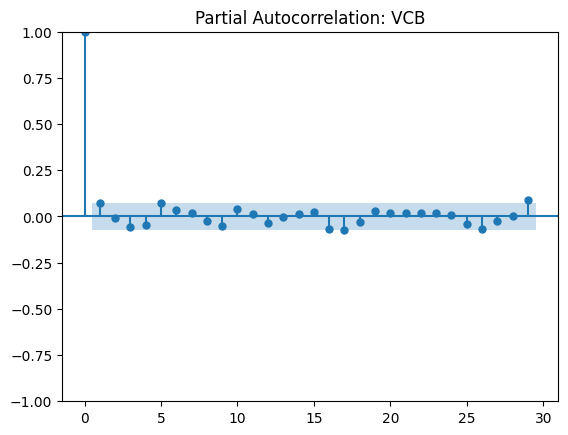

<Figure size 1500x500 with 0 Axes>

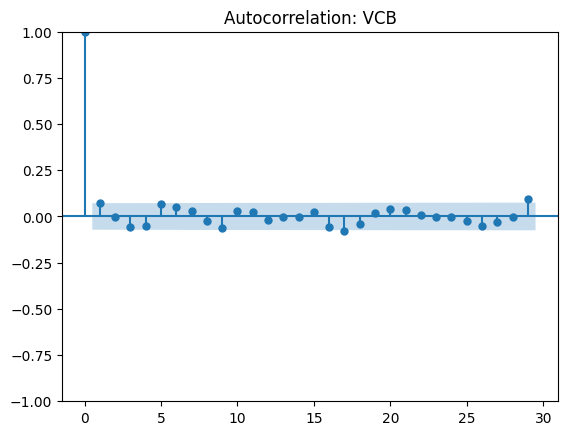

<Figure size 1500x500 with 0 Axes>

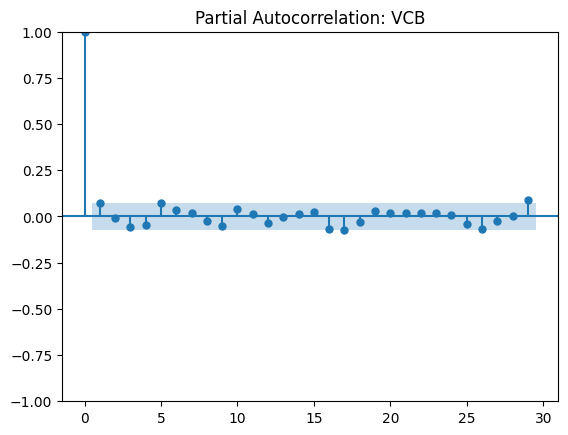

In [32]:



acf_pacf_plot(VCB_cleaned['Daily_Returns'],"VCB")
acf_pacf_plot(VCB_cleaned['Daily_Returns'],"VCB")

In [33]:
print(len(VCB_cleaned))
train_VCB = VCB_cleaned['Daily_Returns'][:720]
test_VCB = VCB_cleaned['Daily_Returns'][720:]
print(len(train_VCB ))
print(len(test_VCB))

749
720
29


In [34]:
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")
model = pm.auto_arima(train_VCB,start_p=2, start_q=2, max_p=5, max_d=5, max_q=5,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,stepwise=True
                           )
# make your forecasts
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3714.208, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3700.613, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3701.432, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3701.416, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3697.600, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3697.432, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-3703.852, Time=0.71 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-3711.111, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3699.431, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-3697.649, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-3697.942, Time=0.12 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-3703.559, Time=0.72 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3698.442, Time=0.98 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 4.948 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(2, 0, 2)   Log Likelihood                1862.104
Date:                Sat, 04 Nov 2023   AIC                          -3714.208
Time:                        19:25:03   BIC                          -3691.312
Sample:                             0   HQIC                         -3705.369
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3002      0.028     10.542      0.000       0.244       0.356
ar.L2         -0.9176      0.028    -33.056      0.000      -0.972      -0.863
ma.L1         -0.2546      0.023    -11.015      0.000      -0.300      -0.209
ma.L2          0.9626      0.022     44.593      0.000       0.920       1.005
sigma2         0.0003   1.29e-05     25.753      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               121.81
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.24
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

start_date = pd.to_datetime('2020-01-03')
end_date = pd.to_datetime('2022-11-21')
train_VCB_sliced = train_VCB[(train_VCB.index >= start_date) & (train_VCB.index <= end_date)]

model = sm.tsa.ARIMA(train_VCB_sliced, order=(2, 0, 2))
result = model.fit()
print(result.summary().tables[1])
predictions = result.predict(start=len(train_VCB), end=len(train_VCB) + len(train_VCB) - 1, dynamic=False, typ='levels')


rmse = np.sqrt(mean_squared_error(train_VCB, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.636      0.525      -0.001       0.002
ar.L1          0.2459      0.116      2.123      0.034       0.019       0.473
ar.L2         -0.8191      0.107     -7.643      0.000      -1.029      -0.609
ma.L1         -0.2264      0.108     -2.089      0.037      -0.439      -0.014
ma.L2          0.8707      0.099      8.772      0.000       0.676       1.065
sigma2         0.0003   1.32e-05     25.305      0.000       0.000       0.000
Root Mean Squared Error (RMSE): 0.01849850443562083


In [36]:
# result.plot_diagnostics(figsize=(15, 12))

In [37]:
# VCB_cleaned['Daily_Returns']
# len(test_VCB)
# print(train_VCB.tail())
# print(VCB_cleaned['Daily_Returns'][720:].head())

<Axes: xlabel='date'>

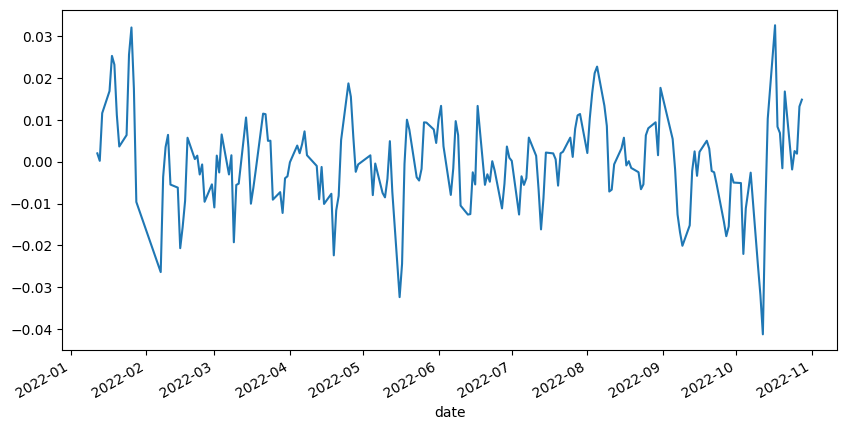

In [66]:
predictions.plot(figsize=(10, 5))

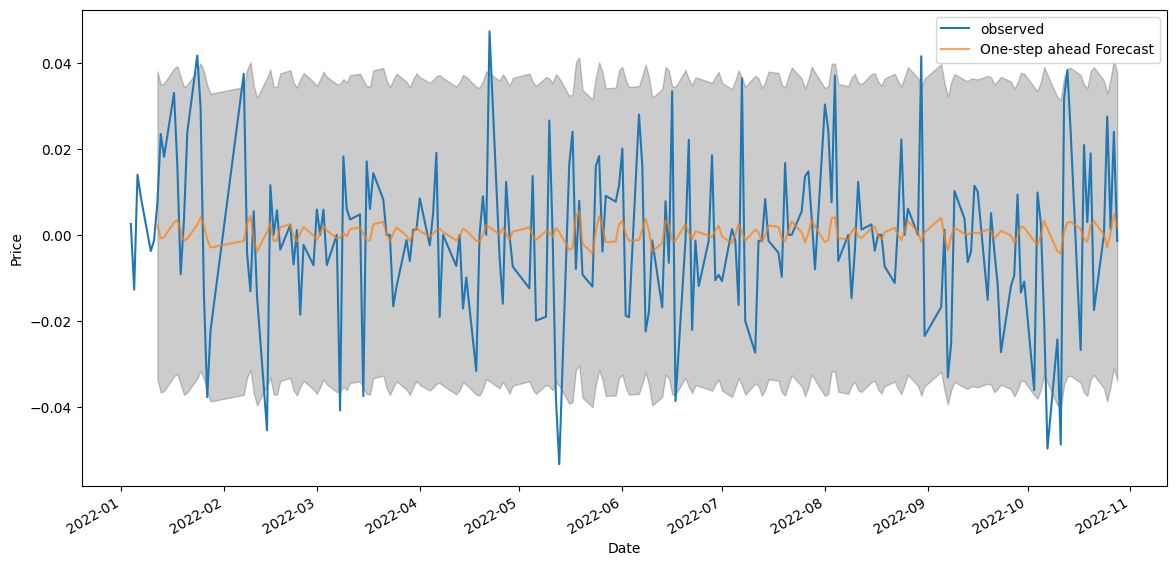

In [39]:
pred = result.get_prediction(start=pd.to_datetime('2022-1-12'),end=pd.to_datetime('2022-10-28'), dynamic=False, typ='levels')
pred_ci = pred.conf_int()

ax = VCB_cleaned['Daily_Returns']['2022-1-1':'2022-10-28'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.01812620268051453


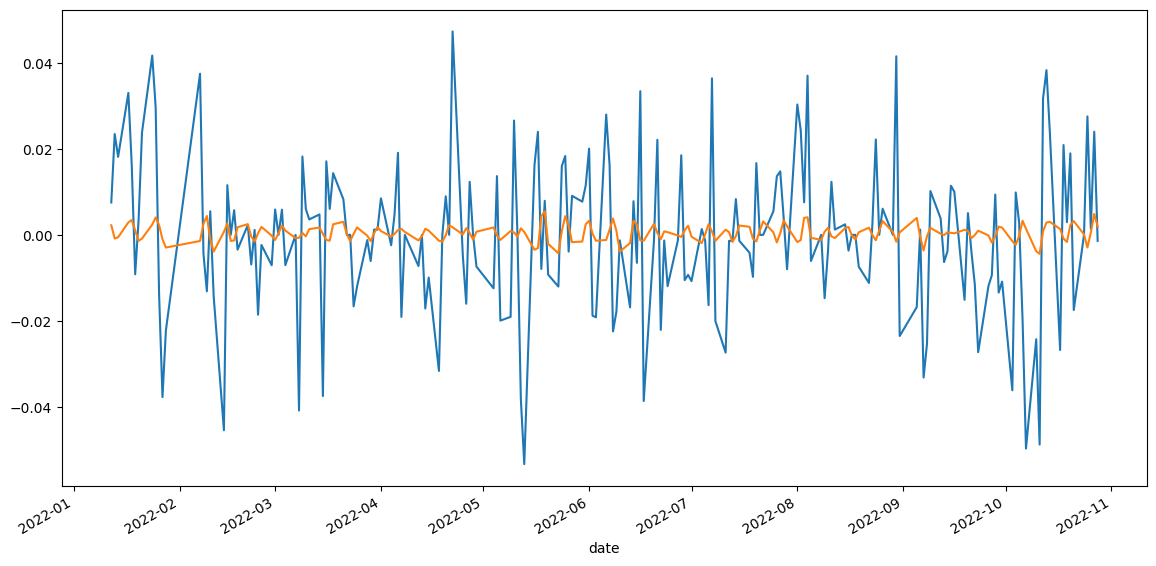

In [40]:
predicted_values = pred.predicted_mean


observed_values = train_VCB['2022-1-12':'2022-10-28']


rmse = np.sqrt(mean_squared_error(observed_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")


ax = observed_values.plot(label='observed', figsize=(14, 7))
ax = predicted_values.plot(label='observed', figsize=(14, 7))


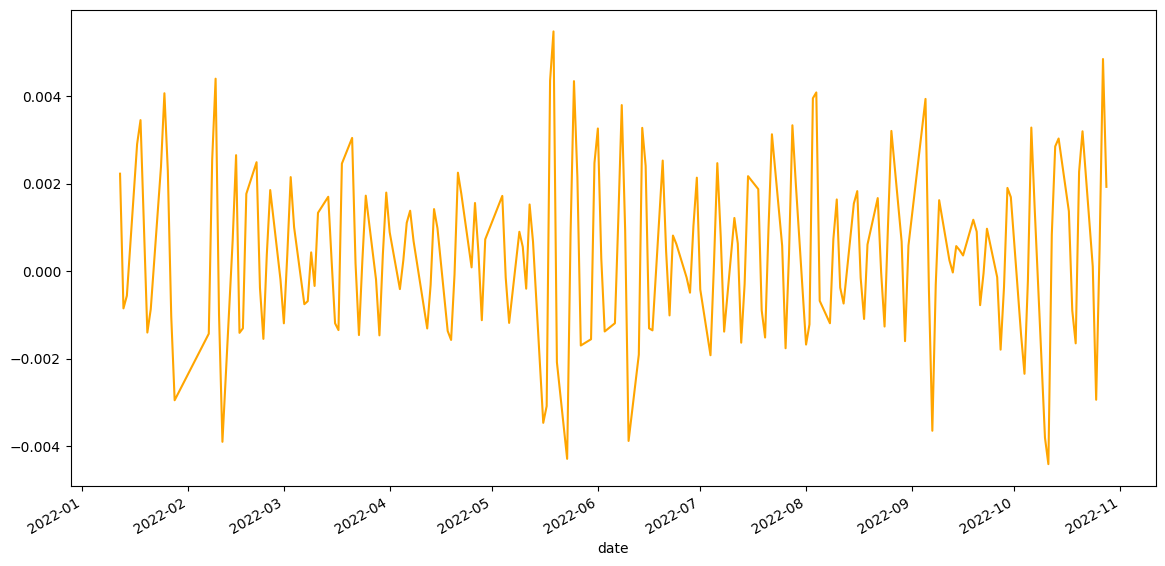

In [41]:
ax = predicted_values.plot(label='observed', figsize=(14, 7),color='orange')

In [42]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

p = d = q = range(0, 5)

pdq = list(itertools.product(p, d, q))
import warnings
warnings.filterwarnings("ignore")
best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        mod = sm.tsa.ARIMA(VCB_cleaned["Daily_Returns"], order=param)

        results = mod.fit()
        print(f"ARIMA({param}) - AIC : {results.aic}")
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best (p, d, q): {best_pdq}")



ARIMA((0, 0, 0)) - AIC : -3837.478703505013
ARIMA((0, 0, 1)) - AIC : -3839.53497441076
ARIMA((0, 0, 2)) - AIC : -3837.538808195371
ARIMA((0, 0, 3)) - AIC : -3837.1390659694944
ARIMA((0, 0, 4)) - AIC : -3837.79345647555
ARIMA((0, 1, 0)) - AIC : -3372.033272775462
ARIMA((0, 1, 1)) - AIC : -3824.7307510497344
ARIMA((0, 1, 2)) - AIC : -3826.92556965538
ARIMA((0, 1, 3)) - AIC : -3824.933501235849
ARIMA((0, 1, 4)) - AIC : -3824.4413795268083
ARIMA((0, 2, 0)) - AIC : -2567.441398846782
ARIMA((0, 2, 1)) - AIC : -3357.905786880301
ARIMA((0, 2, 2)) - AIC : -3798.892239952207
ARIMA((0, 2, 3)) - AIC : -3801.605923782626
ARIMA((0, 2, 4)) - AIC : -3735.0081950913454
ARIMA((0, 3, 0)) - AIC : -1671.989079498774
ARIMA((0, 3, 1)) - AIC : -2554.3862426535443
ARIMA((0, 3, 2)) - AIC : -3333.3651496569714
ARIMA((0, 3, 3)) - AIC : -3762.67016847942
ARIMA((0, 3, 4)) - AIC : -3709.3377673276523
ARIMA((0, 4, 0)) - AIC : -738.2590507226267
ARIMA((0, 4, 1)) - AIC : -1660.108697705489
ARIMA((0, 4, 2)) - AIC : -253

In [43]:
model = sm.tsa.ARIMA(train_VCB, order=(5,3,5))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:          Daily_Returns   No. Observations:                  720
Model:                 ARIMA(5, 3, 5)   Log Likelihood                1721.428
Date:                Sat, 04 Nov 2023   AIC                          -3420.856
Time:                        19:26:50   BIC                          -3370.530
Sample:                             0   HQIC                         -3401.423
                                - 720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.4230      0.107    -32.139      0.000      -3.632      -3.214
ar.L2         -4.7908      0.280    -17.119      0.000      -5.339      -4.242
ar.L3         -3.4769      0.302    -11.518      0.0

Root Mean Squared Error (RMSE): 0.021572165522513075
Root Mean Absolute Error (RMAE): 0.12750673449821648


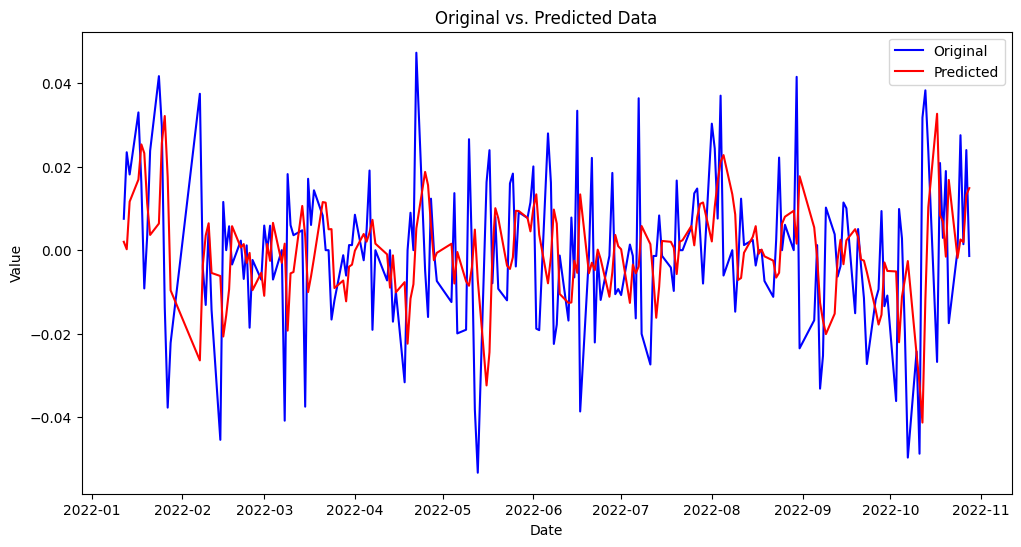

In [82]:
start_date = pd.to_datetime('2022-1-12')
end_date = pd.to_datetime('2022-10-28')

predictions = result.predict(start=start_date, end=end_date, typ='levels')

original_data = VCB_cleaned["Daily_Returns"][start_date:end_date]
rmse = np.sqrt(mean_squared_error(original_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmae = np.sqrt(mean_absolute_error(original_data, predictions))
print(f"Root Mean Absolute Error (RMAE): {rmae}")

plt.figure(figsize=(12, 6)) 
plt.plot(original_data.index, original_data, label='Original', color='blue')


plt.plot(predictions.index, predictions, label='Predicted', color='red')


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original vs. Predicted Data')
plt.legend()

# Show the plot
plt.show()


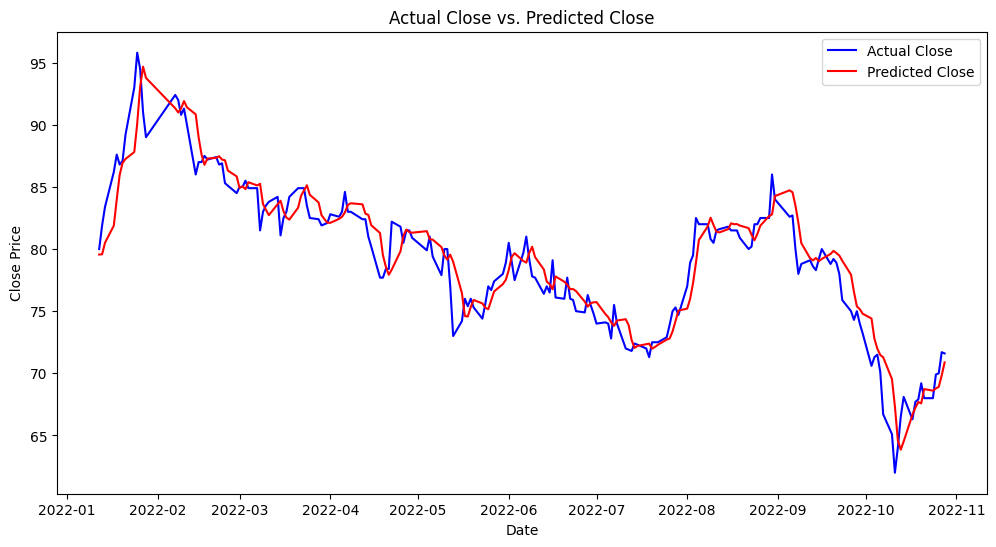

Root Mean Squared Error (RMSE): 1.8308295471654856
Root Mean Absolute Error (RMAE): 1.1667749119008182


In [83]:
import matplotlib.pyplot as plt

actual_close = VCB_cleaned["close"][start_date:end_date]

plt.figure(figsize=(12, 6))

plt.plot(actual_close.index, actual_close, label='Actual Close', color='blue')

date_minus_one_day = start_date - pd.DateOffset(days=1)
data_on_date_minus_one_day = VCB_cleaned["close"].loc[date_minus_one_day]
predicted_close = data_on_date_minus_one_day.values*np.exp(np.cumsum(predictions))

plt.plot(actual_close.index, predicted_close, label='Predicted Close', color='red')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close vs. Predicted Close')
plt.legend()

plt.show()

rmse = np.sqrt(mean_squared_error(actual_close, predicted_close))
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmae = np.sqrt(mean_absolute_error(actual_close, predicted_close))
print(f"Root Mean Absolute Error (RMAE): {rmae}")


In [46]:
predicted_close = data_on_date_minus_one_day.values*np.exp(np.cumsum(predictions))
print(data_on_date_minus_one_day)
print(predicted_close)

Symbols
VCB    79.4
Name: 2022-01-11 00:00:00, dtype: float64
date
2022-01-12    79.559705
2022-01-13    79.577212
2022-01-14    80.509133
2022-01-17    81.883401
2022-01-18    83.986269
                ...    
2022-10-24    68.603695
2022-10-25    68.779776
2022-10-26    68.912981
2022-10-27    69.830975
2022-10-28    70.877415
Name: predicted_mean, Length: 198, dtype: float64


In [47]:
# from statsmodels.tsa.arima.model import ARIMA
# import statsmodels.api as sm
# def _arima_fit(orders, data):
#   models = dict()
#   for order in orders:
#     model = sm.tsa.ARIMA(data, order = order).fit()
#     model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
#     print('{} --> AIC={}; BIC={}'.format(model_name, model.aic, model.bic))
#     models[model_name] = model
#   return models

# orders = [(1, 0, 1),(1, 0, 0),(1, 1, 0) , (1, 1, 1),(0, 1, 1),(0,0,1)]
# models = _arima_fit(orders,VCB_Diff_1[:720])

In [48]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import matplotlib.pyplot as plt
# plt.figure(figsize = (50, 10))
# ax1 = plot_acf(VCB_cleaned['Daily_Returns'],lags=40)
# plt.figure(figsize = (50, 10))
# ax1 = plot_pacf(VCB_cleaned['Daily_Returns'],lags=40)

In [49]:
# import statsmodels.api as sm


# # train_data = VCB_cleaned['Daily_Returns'][:720]
# # test_data = VCB_cleaned['Daily_Returns'][720:]
# train_data = VCB_Diff_1[:720]
# test_data = VCB_Diff_1[720:]
# model = sm.tsa.ARIMA(train_data, order=(29,0,29))
# model = model.fit()

# predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False, typ='levels')
# from sklearn.metrics import mean_squared_error

# # Tính RMSE
# rmse = np.sqrt(mean_squared_error(test_data, predictions))
# print(f"Root Mean Squared Error (RMSE): {rmse}")

In [50]:
# print(np.array(predictions)[:6])
# print(np.array(VCB_cleaned['Daily_Returns'][720:][:6]))

In [51]:
# import matplotlib.pyplot as plt

# # Chọn số lượng quan sát tương ứng với tập kiểm tra
# test_data_length = len(test_data)

# # Tạo một dãy thời gian từ 0 đến độ dài tập kiểm tra
# time = range(test_data_length)

# # Vẽ biểu đồ cho dữ liệu thực tế
# plt.figure(figsize=(12, 6))
# plt.plot(time, test_data, label='Real Data', color='blue')

# # Vẽ biểu đồ cho dự đoán
# plt.plot(time, predictions, label='Predictions', color='red')

# # Đặt tên cho trục và chú thích
# plt.xlabel('Time')
# plt.ylabel('Returns')
# plt.legend()

# # Hiển thị biểu đồ
# plt.show()


In [52]:
# print(VCB_cleaned['close'][718:721])

In [53]:
# import numpy as np
# # print(len(predictions))
# # Khởi tạo danh sách reconstructed_close như một danh sách trống
# reconstructed_close = []

# # Lấy giá đóng cuối cùng của tập train và thêm vào danh sách
# reconstructed_close.append(73.5)

# # Tái tạo giá đóng từ dự đoán
# for i in range(720,749):
#     reconstructed_close.append(reconstructed_close[-1] * np.exp(predictions[i]))

# # In kết quả
# print(reconstructed_close[:10])
# print(np.array(VCB_cleaned['close'][720:][:10]))


In [54]:
# import matplotlib.pyplot as plt

# # Chọn số lượng quan sát tương ứng với tập kiểm tra
# test_data_length = len(VCB_cleaned['close'][720:])

# # Tạo một dãy thời gian từ 0 đến độ dài tập kiểm tra
# time = range(test_data_length)

# # Vẽ biểu đồ cho dữ liệu thực tế
# plt.figure(figsize=(12, 6))
# plt.plot(time, VCB_cleaned['close'][720:], label='Real Data', color='blue')

# # Vẽ biểu đồ cho dự đoán
# plt.plot(time, reconstructed_close[1:], label='Predictions', color='red')

# # Đặt tên cho trục và chú thích
# plt.xlabel('Time')
# plt.ylabel('Returns')
# plt.legend()

# # Hiển thị biểu đồ
# plt.show()

In [55]:
# import statsmodels.api as sm


# model = sm.tsa.ARIMA(VCB_cleaned['Daily_Returns'][:700], order=(1, 0, 1))

# # Fit mô hình
# model = model.fit()

# # Dự đoán `steps` bước tiếp theo
# steps = 51  # Số bước tiếp theo bạn muốn dự đoán
# forecast = model.get_forecast(steps=steps)

# # Lấy giá trị dự đoán và khoảng tin cậy
# forecast_mean = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

# # In kết quả
# print("Dự đoán:", forecast_mean.tail(10))
# # print("Khoảng tin cậy:", forecast_ci)
# print("REAL:",VCB_cleaned['Daily_Returns'][700:])

In [56]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(VCB_cleaned['Daily_Returns'], start_p=0, start_q=0,
#                            max_p=5, max_q=5, m=12,
#                            start_P=0, seasonal=False,
#                            d=0, D=0, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

In [57]:
# fig, ax = plt.subplots(figsize=(15, 10))
# x = np.arange(daily_returns_list.shape[0])
# ax.plot(daily_returns_list,label="real")
# ax.plot(x[700:],forecast_mean, label="fake")
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# ax.set_title(f'Plot for Stock Price')
# plt.legend()
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.plot(x[700:],forecast_mean, label="fake")
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.plot(daily_returns_list[700:], label="fake")

In [58]:
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error